In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [ ]:
!pip install dask
!python -m pip install 'fsspec>=0.3.3'
import dask.dataframe as dd

In [ ]:
import pandas as pd
%time df = pd.read_csv('/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv', encoding='utf-8')

In [ ]:
%time df = dd.read_csv("/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv")

In [ ]:
df.shape

(2830743, 80)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# rfe = RFE(model, 4)
# fit = rfe.fit(X, Y)
# print("Number of Features: %d")
# print("Selected Features: %s")
# print("Feature Ranking: %s")

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=40)
# fit = pca.fit(X)
# print("Explained Variance: %s") % fit.explained_variance_ratio_
# print(fit.components_)


In [ ]:
# print('---------------------------Random Forest CLassifier------------------')
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators =15)
# model = model.fit(x_train, y_train)
# rfy_pred = model.predict(x_test)
# acc = metrics.accuracy_score(y_test, y_pred)
# print(model.score(x_test,y_test))

In [ ]:
# attributes = list(x_train)
# sorted(zip(model.feature_importances_, attributes), reverse=True)

In [ ]:
!pip install h5py

In [4]:
# Save to HDF5
df.to_hdf(filename, 'data', mode='w', format='table')
del df

NameError: ignored

In [5]:
filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/test_data.h5'

In [ ]:

# print(pd.read_hdf(filename, 'data'))
%time df = dd.read_hdf(filename, 'data')

In [7]:
%time df = pd.read_hdf(filename, 'data')

CPU times: user 7.55 s, sys: 4.54 s, total: 12.1 s
Wall time: 57.6 s


In [8]:
# # df.head(10)
# df.shape
df.info()
df.columns[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

' Destination Port'

In [ ]:
df.shape

(2830743, 79)

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [ ]:
ll = []
for i in df.columns:
  ll.append(i)


In [ ]:
ll
# print(len(ll))

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 'Fwd PSH Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 ' Subflow Fwd Byte

In [10]:
# -------------------changing datatypes

def check_size_dtypes(df):
  max = df.max()
  print(max, 'max')

  min = df.min()
  print(min, 'min')
  # print(df.value_counts())
  var1 = df.memory_usage(index=False, deep=True)
  print(var1,'This is the memory usage')
  print(df.sample(20))


def convert_datatypes(df,a='uint8'):
  print('Trying to convert datatypes for less memory usage')
  max = df.max()
  print(max, 'max')

  min = df.min()
  print(min, 'min')

  # print(df.value_counts())

  var1 = df.memory_usage(index=False, deep=True)
  print(var1, 'memory usage')
  df = df.astype(a)
  var2 = df.memory_usage(index=False, deep=True)
  print(var2, ' new memory usage| the difference -> ', var1 / var2)
  return df

def normalize(df):
  normalized_df=( (df-df.min() ) / (df.max() )) * 255
  return normalized_df

In [13]:
print('--------Destination Port---------------')
check_size_dtypes(df[' Destination Port'])

--------Destination Port---------------
255 max
0 min
2827876 This is the memory usage
2394092      0
482637       1
1111986      0
844640       1
1831406      1
2485122      1
1574772      0
1064451     63
2608278      0
1043283      0
2247780      0
225665       1
2354591      0
16127        1
2467548      0
1849080    221
1570206    151
466533       0
1529176      0
2448990      0
Name:  Destination Port, dtype: uint8


In [12]:
# convert_datatypes(df[' Destination Port'])
df[' Destination Port'] = normalize(df[' Destination Port'])
df[' Destination Port'] = convert_datatypes(df[' Destination Port'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [11]:
# obv.sample(10)
print(df[' Destination Port'].memory_usage(index=False, deep=True), 'memory usage')

2830743 memory usage


In [10]:
df[' Destination Port'].max()

255

In [12]:
print('-----------flow duration dtype change-------------')
# ----------------------------------------------------
# ----------
# ----------------------------------------------')

-----------flow duration dtype change-------------


In [13]:
 check_size_dtypes(df[' Flow Duration']) #df[' Flow Duration'] = 
# check_size_dtypes(obv)

119999998 max
-13 min
22645944 This is the memory usage
547105        47567
2697880         772
2506345           3
643402      5583618
1805196         181
1017270       30844
2544934     5860506
729271        24481
1021686          18
2717648         162
836666            3
718685     67073606
2801233          52
2315058    81986202
1013063      101484
401964           69
303525        64064
1500183    13195214
1841367     5387058
1935386      262768
Name:  Flow Duration, dtype: int64


In [ ]:
df[' Flow Duration'].sample(10)
df[' Flow Duration'].max()

100.0

In [14]:
df[' Flow Duration'] = normalize(df[' Flow Duration'])

In [15]:
df[' Flow Duration'] = convert_datatypes(df[' Flow Duration'])
# convert_datatypes(df[obv], 'int8')

Trying to convert datatypes for less memory usage
255.00002762500048 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [16]:
check_size_dtypes(df[' Flow Duration'])

255 max
0 min
2827876 This is the memory usage
1329337    252
430631       0
1120137      0
199906       0
275613       0
2722736      0
693026      21
580638       0
1491041      0
2405669    182
1376933      0
1948079      0
197054       0
1049569      0
191970      16
2759453     22
934238       0
2538020      0
1904958      0
1002655      0
Name:  Flow Duration, dtype: uint8


In [18]:
print('---------changing total fwd packets dtype----')

---------changing total fwd packets dtype----


In [17]:
print(check_size_dtypes(df[' Total Fwd Packets']))
# check_size_dtypes(obv)
df[' Total Fwd Packets'].sample(10)
df[' Total Fwd Packets'].max()

219759 max
1 min
22623008 This is the memory usage
1152120     2
1438110     2
1701335    10
2766295     2
529303      2
1004313     1
2722537     2
1581145     1
2236959     6
262206      4
1908072    15
435973      1
2741172     2
706554     16
2242097     7
1382271     2
2695501     1
2711101     2
2774831    42
2694814     2
Name:  Total Fwd Packets, dtype: int64
None


219759

In [18]:
df[' Total Fwd Packets'] = normalize(df[' Total Fwd Packets'])

In [19]:
 df[' Total Fwd Packets'] = convert_datatypes(df[' Total Fwd Packets'])

Trying to convert datatypes for less memory usage
254.99883963796705 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [20]:
check_size_dtypes(df[' Total Fwd Packets'])

254 max
0 min
2827876 This is the memory usage
1193861    0
356837     0
765988     0
687534     0
2588950    0
2554201    0
1360373    0
73302      0
2115933    0
2471294    0
407951     0
2467264    0
438298     0
442092     0
934001     0
689399     0
2081061    0
66384      0
153132     0
1001910    0
Name:  Total Fwd Packets, dtype: uint8


In [21]:
type(df[' Total Fwd Packets'][1111])
# del obv


numpy.uint8

In [21]:
print('---------------------changing total backward packets datatype------------------')
print(df[' Total Backward Packets'].sample(10))
df[' Total Backward Packets'].max()

---------------------changing total backward packets datatype------------------
2461197    0
2308260    0
586738     1
2642451    2
799537     1
1886057    0
454182     1
560203     2
2009971    2
125873     0
Name:  Total Backward Packets, dtype: int64


291922

In [24]:
check_size_dtypes(df[' Total Backward Packets'])
df[' Total Backward Packets'] = normalize(df[' Total Backward Packets'])
df[' Total Backward Packets'] = convert_datatypes(df[' Total Backward Packets'])

255 max
0 min
2827876 This is the memory usage
1784590    86
767844      2
2782402     2
2534417     2
263406      2
1050433     0
447100      1
846982     79
2108455     0
555414      1
695421      0
2711843     2
2204598     1
2150611    25
1388803     0
1727235     1
594565     11
2463102     7
2447837     2
2470788     0
Name:  Total Backward Packets, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [ ]:
ll

In [24]:
df['Total Length of Fwd Packets'].sample(10)
df['Total Length of Fwd Packets'].max()

12900000

In [25]:
# check_size_dtypes(df['Total Length of Fwd Packets'])
df[' Fwd Packet Length Max'] = normalize(df[' Fwd Packet Length Max'])
df[' Fwd Packet Length Max'] = convert_datatypes(df[' Fwd Packet Length Max'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [26]:
# df[' Fwd Packet Length Max'].sample(10)
# df[' Fwd Packet Length Max'].max()
check_size_dtypes(df[' Fwd Packet Length Max'])

255 max
0 min
2827876 This is the memory usage
112171     60
2563772     0
2331305     3
936954      3
46347       0
1440788     0
1142466     0
891113      5
903028      0
535135      0
343469      0
1581305     0
606580      0
211784      0
662016      0
1636216     0
290075      0
1504972     0
2394115     3
1364344     0
Name:  Fwd Packet Length Max, dtype: uint8


In [28]:

def print_title(a):  
  for i in range(5):
    print('---------------',a,'-----------------')
print_title('Fwd Packet Length Min')

--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------
--------------- Fwd Packet Length Min -----------------


In [27]:
check_size_dtypes(df[' Fwd Packet Length Min'])

2325 max
0 min
22623008 This is the memory usage
975460      0
1234703     0
1007972    47
1506456     0
187931      6
1278201    43
1480177    51
2750591    36
2232788     0
556881      6
2068952    34
1928358    44
309227     33
1758683     0
2597880    42
396616      0
2077333     0
2087084    36
2173662     8
2805774    50
Name:  Fwd Packet Length Min, dtype: int64


In [28]:
check_size_dtypes(df[' Fwd Packet Length Min'])
df[' Fwd Packet Length Min'] = normalize(df[' Fwd Packet Length Min'])
df[' Fwd Packet Length Min'] = convert_datatypes(df[' Fwd Packet Length Min'])

2325 max
0 min
22623008 This is the memory usage
539317      0
876631      0
2336337     0
1581530     0
1117628     6
550902     38
1476342    37
696765     40
2557516    33
2155711     0
1169476     0
324001      2
831571      6
104227      0
412070      0
2045314     0
2254816     0
371958      2
523932      6
1612109    51
Name:  Fwd Packet Length Min, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [29]:
check_size_dtypes(df[' Fwd Packet Length Min'])

255 max
0 min
2827876 This is the memory usage
2599130    0
2212087    0
405564     0
359298     0
307536     0
1931298    0
1546239    6
2573372    6
1500812    3
1342354    3
302184     0
2689399    0
2669121    3
1443858    3
2621482    0
666943     4
541390     0
158076     0
2619304    0
1774237    4
Name:  Fwd Packet Length Min, dtype: uint8


In [32]:
# check_size_dtypes(df[''])

In [33]:
# check_size_dtypes(df[''])
# df[''] = convert_datatypes([df[' '], 'int16')

In [34]:
# check_size_dtypes(df[' Fwd Packet Length Min'])

In [35]:
# check_size_dtypes(df[' '])
# df[' '] = convert_datatypes(df[''], 'int16')
# check_size_dtypes(df[''])
# df[' '] = convert_datatypes(df[''], 'int16')

In [36]:
print_title('Fwd Packet Length Mean')

--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------
--------------- Fwd Packet Length Mean -----------------


In [30]:
check_size_dtypes(df[' Fwd Packet Length Mean'])
# df[' Fwd Packet Length Mean'] = convert_datatypes(df[' Fwd Packet Length Mean'], 'int16')

5940.857143 max
0.0 min
22623008 This is the memory usage
509520     33.000000
1063718    30.000000
2390761    57.666667
1565864     0.000000
528833     78.000000
901515     41.888889
1133162    30.000000
645226     50.000000
1478116    30.000000
1879448    25.666667
2119989     0.000000
272996     51.000000
1749025    43.750000
1742839    34.000000
2806337    47.000000
861630      0.000000
564712      3.000000
864745      6.000000
1081733    30.000000
2251513    72.800000
Name:  Fwd Packet Length Mean, dtype: float64


In [31]:
df[' Fwd Packet Length Mean'] = normalize(df[' Fwd Packet Length Mean'])
# check_size_dtypes(df[' Fwd Packet Length Mean'])
df[' Fwd Packet Length Mean'] = convert_datatypes(df[' Fwd Packet Length Mean'])
check_size_dtypes(df[' Fwd Packet Length Mean'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1366610    0
2323314    1
993683     1
2795772    1
2232234    5
2406559    2
691240     0
1874654    3
1233472    1
1274264    1
1253917    0
1819809    2
735049     0
88647      0
2452758    0
859725     0
305612     2
976472     3
1465906    1
1036103    0
Name:  Fwd Packet Length Mean, dtype: uint8


In [39]:
print_title('Fwd Packet Length Std')

--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------
--------------- Fwd Packet Length Std -----------------


In [40]:
check_size_dtypes(df[' Fwd Packet Length Std'])

7125.5968458437 max
0.0 min
22645944 This is the memory usage
1270579      0.000000
2332319    182.040655
690722      64.068855
1098822      0.000000
175474       0.000000
1065952      0.000000
2581983    189.504617
1770038      0.000000
729199       5.656854
2102823      0.000000
1100114      0.000000
1013239    305.190578
755813       0.000000
2184539      0.000000
1954491      0.000000
872701     109.864573
2701841      0.000000
1757244      0.000000
1902824      0.000000
713670       0.000000
Name:  Fwd Packet Length Std, dtype: float64


In [32]:
df[' Fwd Packet Length Std'] = normalize(df[' Fwd Packet Length Std'])
df[' Fwd Packet Length Std'] = convert_datatypes(df[' Fwd Packet Length Std'])
check_size_dtypes(df[' Fwd Packet Length Std'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
616996      0
828362      5
254795      0
400227      0
2626077     0
1935536     0
437918      0
834294      0
408356      0
929977      9
1242855     0
694505      0
2741893     0
476189      0
1269291     0
552071      3
44058       0
291514      0
1312756     0
737386     27
Name:  Fwd Packet Length Std, dtype: uint8


In [42]:
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',

(' Bwd Packet Length Std',)

In [43]:
print_title('Bwd Packet Length Max')

--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------
--------------- Bwd Packet Length Max -----------------


In [44]:
check_size_dtypes(df['Bwd Packet Length Max'])

19530 max
0 min
22645944 This is the memory usage
2321896    5792
1781832    1858
722565        0
193033     5840
2328561    5792
1835249      68
610567      669
1322245    1460
1908803    1448
2369146    5792
2023241       0
1318577       0
617290      168
177728        0
2221936    5792
648165      110
684542      156
2454200    1448
2713641      91
2690281       0
Name: Bwd Packet Length Max, dtype: int64


In [33]:
df['Bwd Packet Length Max'] = normalize(df['Bwd Packet Length Max'])
df['Bwd Packet Length Max'] = convert_datatypes(df['Bwd Packet Length Max'])
check_size_dtypes(df['Bwd Packet Length Max'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1862657      0
894677       4
83063        0
1203732      0
721687       1
768165       0
680048      18
1118099      1
1363429      0
1222181      1
1084224      0
1409982      0
1212965      0
1493298      0
113972       0
760588       2
44919      113
2015757      0
2284469     75
913464       0
Name: Bwd Packet Length Max, dtype: uint8


In [46]:
print_title(' Bwd Packet Length Min')

---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------
---------------  Bwd Packet Length Min -----------------


In [47]:
check_size_dtypes(df[' Bwd Packet Length Min'])

2896 max
0 min
22645944 This is the memory usage
215979       0
569451       6
705280       0
948960      93
1094237    107
1213356    127
1374082      0
574270       0
1409883      0
1142348     94
1501595      6
2577472      0
2818045      0
2069339      0
2369382      0
265332       6
929381       0
857742       0
1447119      6
1508977     92
Name:  Bwd Packet Length Min, dtype: int64


In [34]:
df[' Bwd Packet Length Min'] = normalize(df[' Bwd Packet Length Min'])
df[' Bwd Packet Length Min'] = convert_datatypes(df[' Bwd Packet Length Min'])
check_size_dtypes(df[' Bwd Packet Length Min'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1216906     0
1207780    11
1370545     0
2537961     0
1335223     0
1856598     0
1255525    10
2185838    11
438643      0
1126279     0
1068597     0
2713512     9
2211087     0
2079795     4
2070944     0
281229      0
703095      8
2633324     0
897763      0
1560040    12
Name:  Bwd Packet Length Min, dtype: uint8


In [49]:
print_title(' Bwd Packet Length Std')

---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------
---------------  Bwd Packet Length Std -----------------


In [50]:
check_size_dtypes(df[' Bwd Packet Length Std'])

8194.660487000001 max
0.0 min
22645944 This is the memory usage
2231080    1757.579003
484244        0.000000
2737952       0.000000
2351386    1754.831473
1411580       0.000000
1216145       0.000000
2208811       0.000000
2581237       0.000000
506412        0.000000
327055        0.000000
39522      2177.344966
2001751       0.000000
74818         0.000000
2021940       0.000000
1718876      51.215232
1783330    1070.201154
1253072       0.000000
1573037       0.000000
1515567       0.000000
1039755     622.626518
Name:  Bwd Packet Length Std, dtype: float64


In [35]:
df[' Bwd Packet Length Std'] = normalize(df[' Bwd Packet Length Std'])
df[' Bwd Packet Length Std'] = convert_datatypes(df[' Bwd Packet Length Std'])
check_size_dtypes(df[' Bwd Packet Length Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2616580      0
997982      35
527836       0
266063       0
1521403      0
447177       0
106522     103
812852       0
2084940      0
804427       0
1274683     10
1618927      0
227499       0
1768705      0
1028733     22
317190       0
947275       0
544679       0
1571876      0
2005842      0
Name:  Bwd Packet Length Std, dtype: uint8


In [52]:
print_title(' Bwd Packet Length Mean')

---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------
---------------  Bwd Packet Length Mean -----------------


In [53]:
check_size_dtypes(df[' Bwd Packet Length Mean'])


5800.5 max
0.0 min
22645944 This is the memory usage
138202        6.000000
2479400      77.000000
2422067    2319.000000
2426389    1656.428571
2134397      52.000000
240189      506.285714
2035010     168.000000
1155450      84.000000
984640       97.000000
2203327       0.000000
697446        0.000000
1026555     138.000000
135022     2321.400000
2438004    1932.500000
698490        6.000000
1965831     116.000000
1050754     226.000000
1900699     279.615385
796911       38.000000
1809572     635.142857
Name:  Bwd Packet Length Mean, dtype: float64


In [36]:
df[' Bwd Packet Length Mean'] = normalize(df[' Bwd Packet Length Mean'])
df[' Bwd Packet Length Mean'] = convert_datatypes(df[' Bwd Packet Length Mean'])
check_size_dtypes(df[' Bwd Packet Length Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2356781      0
2622780      8
1440183      0
179916     102
93569       85
2765954      0
1873303      8
2323121     72
1304163      4
2267070      0
2375668      0
1128301      0
1655033      2
1351670      0
1652412      1
1114260      7
1323136      0
2282181    101
2819370      5
228570       0
Name:  Bwd Packet Length Mean, dtype: uint8


In [ ]:
ll

In [ ]:
print_title('flow bytes')

--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------
--------------- flow bytes -----------------


In [55]:
check_size_dtypes(df['Flow Bytes/s'])

inf max
-261000000.0 min
22645944 This is the memory usage
1142137    0.000000e+00
86041      1.077878e+05
1780444    2.616480e+03
797660     1.674148e+03
2719549    0.000000e+00
1057640    7.977952e+03
1425952    1.333333e+06
1567963    1.106283e+02
685362     2.004685e+03
48510      2.613279e+05
2040264    1.593750e+06
128589     6.847573e+03
1412985    1.333333e+06
862931     4.285714e+05
1637796    6.771441e+01
627852     1.002546e+03
1963652    0.000000e+00
2585721    2.274194e+06
645948     8.262706e+02
2741524    3.590721e+03
Name: Flow Bytes/s, dtype: float64


In [43]:
# normalize(df['Flow Bytes/s'])
df['Flow Bytes/s'].sample(20)

2352427    32
757708     32
113298     32
2560968    32
1766809    32
279924     32
476795     32
2650600    32
310196     32
1161922    32
2429163    32
2163890    32
1411450    32
542497     32
1128521    32
384644     32
193474     32
2379959    32
1462267    32
1024140    32
Name: Flow Bytes/s, dtype: uint8

In [44]:
df['Flow Bytes/s'] = normalize(df['Flow Bytes/s'])

df['Flow Bytes/s'] = convert_datatypes(df['Flow Bytes/s'])
check_size_dtypes(df['Flow Bytes/s'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2769342    38
1295238    38
259619     38
2509191    38
1650845    38
2751228    38
2371733    38
292522     38
1526043    38
959352     38
1689937    38
1402520    38
49450      38
1177026    38
31273      38
1363627    38
2366752    38
1051266    38
1475170    38
578337     38
Name: Flow Bytes/s, dtype: uint8


In [45]:
check_size_dtypes(df[' Flow IAT Mean'])

255 max
0 min
2827876 This is the memory usage
1235423     0
2544228     1
673084      0
1847160     0
1859068    70
2483520     0
603451      0
236007      0
2297793     0
520115      0
2078244     0
1562135     0
2313210    16
1488092     0
745382      6
1523706     0
2294761    16
1812101     4
833185      0
2357228    17
Name:  Flow IAT Mean, dtype: uint8


In [46]:
df[' Flow IAT Mean'] = normalize(df[' Flow IAT Mean'])
df[' Flow IAT Mean'] = convert_datatypes(df[' Flow IAT Mean'])
check_size_dtypes(df[' Flow IAT Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2544705     0
2290354    15
1055508     0
1748329     0
875241      0
2707694     0
295907      0
947322      0
34807       0
1448579     0
2574178     0
244124      0
1737811     0
1073021     0
1144891     0
2813181     0
1722234     7
1300903     1
1824341     0
2674013     0
Name:  Flow IAT Mean, dtype: uint8


In [ ]:
print_title('flow IAT STD')

--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------
--------------- flow IAT STD -----------------


In [60]:
 check_size_dtypes(df[' Flow IAT Std'])

84800261.5664079 max
0.0 min
22645944 This is the memory usage
1859521    5.951009e+04
2034284    0.000000e+00
2402994    2.990000e+07
2577942    8.018869e+05
1427395    6.473278e+01
844611     3.125387e+06
652919     1.589196e+04
1880505    3.432598e+06
2731126    2.949740e+04
1525841    2.580123e+04
20275      3.119241e+05
2559696    4.860600e+06
636466     1.414214e+00
663285     1.356660e+04
2750189    6.764900e+04
1183620    0.000000e+00
2752187    1.720000e+07
2125694    1.383245e+04
627877     2.063414e+04
689313     0.000000e+00
Name:  Flow IAT Std, dtype: float64


In [47]:
df[' Flow IAT Std'] = normalize(df[' Flow IAT Std'])
df[' Flow IAT Std'] = convert_datatypes(df[' Flow IAT Std'])
check_size_dtypes(df[' Flow IAT Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2311031     93
1979362      0
914777      18
2778473      0
1318584      0
933509       9
328782       0
733925     163
1702437      5
866031       6
337462       0
1817746      0
2591763      0
1414753      4
2055536      0
2696988      0
2193794      0
2173631      0
1086405      0
1051633      0
Name:  Flow IAT Std, dtype: uint8


In [ ]:
print_title('Flow packets')

--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------
--------------- Flow packets -----------------


In [62]:
check_size_dtypes(df[' Flow Packets/s'])

inf max
-2000000.0 min
22645944 This is the memory usage
2698623      25157.232700
167909           0.419826
2419783        692.520776
2263938          0.141761
1868347      28169.014080
940312       68965.517241
2284752     666666.666700
449182       40816.326530
765442           1.505252
2725558        161.446561
1650871          0.339688
2669805          0.897890
1748816          0.142294
442282       71428.571430
816760         130.450380
2804348        170.277979
874259           0.713783
935828          14.100514
1990240    1000000.000000
1163262         37.811472
Name:  Flow Packets/s, dtype: float64


In [48]:
df[' Flow Packets/s'] = normalize(df[' Flow Packets/s'])
df[' Flow Packets/s'] = convert_datatypes(df[' Flow Packets/s'])
check_size_dtypes(df[' Flow Packets/s'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1194568     85
1735363     85
258550      85
2546598     85
2106517     86
670937      85
567687      85
1330049     85
1481425     85
311904      85
1946022     85
109066      85
2019512     86
2262586    113
393709      91
1583577     85
749364      85
1392142     87
152766      85
1247499     85
Name:  Flow Packets/s, dtype: uint8


In [ ]:
print_title(' Flow IAT Max')

---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------
---------------  Flow IAT Max -----------------


In [64]:
 check_size_dtypes(df[' Flow IAT Max'])
 

120000000 max
-13 min
22645944 This is the memory usage
934526          141
959151        26075
1598901       98986
1375181       33106
1468213         135
874471            4
790889           91
96920         39634
451175            4
2447443      196135
1167481       21799
602767         4315
1293198    10000000
2704848       61228
1693334         544
1804506       50565
1859865    10000000
759088           25
1881907     6771126
2176821       23484
Name:  Flow IAT Max, dtype: int64


In [49]:
df[' Flow IAT Max'] = normalize(df[' Flow IAT Max'])
df[' Flow IAT Max'] = convert_datatypes(df[' Flow IAT Max'])

check_size_dtypes(df[' Flow IAT Max'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1994885      0
2004976      0
2089552      0
903286       0
53617       11
1539190      0
1218547      0
2279805    179
1341246      0
733056       0
1373793      0
1057314      0
887804       0
899509       0
2113278     21
1697902     21
1860363      0
2091697      0
770772      21
1157877      0
Name:  Flow IAT Max, dtype: uint8


In [ ]:
# check_size_dtypes(df[' Flow IAT Mean'])
 
 

In [ ]:
# check_size_dtypes(df[' Flow IAT Max'])

In [ ]:
print_title('flow IAT mean')

--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------
--------------- flow IAT mean -----------------


In [66]:
check_size_dtypes(df[' Flow IAT Min'])

120000000 max
-14 min
22645944 This is the memory usage
1556025    60663
2270173        1
1915           4
927303         3
511247         1
1288328        1
1092973       44
1658996        3
825955     47975
605902         4
2017176        3
1422479        0
2726005        1
2576440        3
2394108        2
592936         4
864315     30538
2821696        4
2749440    22943
2524936      454
Name:  Flow IAT Min, dtype: int64


In [50]:
df[' Flow IAT Min'] = normalize(df[' Flow IAT Min'])
df[' Flow IAT Min'] = convert_datatypes(df[' Flow IAT Min'])
check_size_dtypes(df[' Flow IAT Min'])

# df[' Flow IAT Min'].value_counts()

Trying to convert datatypes for less memory usage
255.00002975000004 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
87891      0
591611     0
137752     0
1273177    0
1675720    0
2463399    0
1531334    0
647625     0
2226426    0
57087      0
260925     0
351866     0
1090537    0
1724417    0
1701614    0
2016516    0
1563857    0
847616     0
1262820    0
2728081    0
Name:  Flow IAT Min, dtype: uint8


In [ ]:
print_title('FWD IAT Total')

--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------
--------------- FWD IAT Total -----------------


In [68]:
check_size_dtypes(df['Fwd IAT Total'])

120000000 max
0 min
22645944 This is the memory usage
670659           48
13930      89400000
711286      1000037
2725651          47
2187466       20246
1596474           3
981506     50148762
2420219    85600000
971555            0
1946838           0
930258     60291227
8397              1
2275130         456
922269            2
2355327    98700000
1522637           2
974485            4
2012690           0
616107            4
1537682           0
Name: Fwd IAT Total, dtype: int64


In [51]:
df['Fwd IAT Total'] = normalize(df['Fwd IAT Total'])
df['Fwd IAT Total'] = convert_datatypes(df['Fwd IAT Total'])

check_size_dtypes(df['Fwd IAT Total'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1311929      0
1243336      0
398013       0
2392734    182
1649297      0
1302114      0
425512       0
178824       4
955875       0
2597359      0
2356122    181
1638696     50
2189748      1
2308133      0
132629     193
734096       0
1106965      0
1757965      0
966638       0
589095       0
Name: Fwd IAT Total, dtype: uint8


In [142]:
print_title('FWD IAT MEAN')

--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------
--------------- FWD IAT MEAN -----------------


In [70]:
 check_size_dtypes(df[' Fwd IAT Mean'])


120000000.0 max
0.0 min
22645944 This is the memory usage
1887232    0.000000e+00
2805552    9.658667e+03
2500991    5.444975e+06
1284052    5.805760e+06
427164     0.000000e+00
181960     2.423290e+06
1870904    2.622744e+06
1666604    4.650000e+02
2528969    5.014530e+06
702349     1.492200e+04
826708     0.000000e+00
2405596    1.420000e+07
217786     2.290000e+02
2726367    0.000000e+00
473674     0.000000e+00
1979331    4.000000e+00
353874     0.000000e+00
642995     1.000000e+00
2054844    4.800000e+01
1831079    7.202026e+06
Name:  Fwd IAT Mean, dtype: float64


In [52]:
df[' Fwd IAT Mean'] = normalize(df[' Fwd IAT Mean'])
df[' Fwd IAT Mean'] = convert_datatypes(df[' Fwd IAT Mean'])

check_size_dtypes(df[' Fwd IAT Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1529833      0
1688647      0
2828309      0
2039729      0
1384147      0
1037755      0
2362993      0
1163059      0
1664081    198
1369913      0
1007989      1
1262686      0
257952       0
2824917      5
1160710      0
50127        0
9531         0
1897725      0
1976070      0
2825411      0
Name:  Fwd IAT Mean, dtype: uint8


In [ ]:
print_title(' Fwd IAT Std')

---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------
---------------  Fwd IAT Std -----------------


In [53]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [73]:
check_size_dtypes(df[' Fwd IAT Std'])


84602929.2769822 max
0.0 min
22623008 This is the memory usage
2391695    3.280000e+07
235121     3.192289e+06
1877485    3.630865e+06
2673423    0.000000e+00
1528083    3.941902e+04
937146     0.000000e+00
930261     3.212851e+06
954143     1.573779e+07
2604422    0.000000e+00
1631300    0.000000e+00
1658824    1.992683e+06
2718132    0.000000e+00
1958846    0.000000e+00
2177896    3.230000e+07
822924     0.000000e+00
1538316    0.000000e+00
842256     1.970253e+06
219843     0.000000e+00
170870     5.332202e+06
388080     0.000000e+00
Name:  Fwd IAT Std, dtype: float64


In [54]:
 
df[' Fwd IAT Std']= normalize(df[' Fwd IAT Std'])
df[' Fwd IAT Std']= convert_datatypes(df[' Fwd IAT Std'])
check_size_dtypes(df[' Fwd IAT Std'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1216598    0
1146048    0
1500167    0
91290      9
2789680    0
2350327    0
420606     0
567664     0
213971     0
1266122    0
626523     0
518658     0
393093     0
454498     0
470400     0
1438259    0
2137692    0
980628     0
1272935    5
2499678    0
Name:  Fwd IAT Std, dtype: uint8


In [ ]:
 check_size_dtypes(df[' Fwd IAT Std'])


100.0 max
0.0 min
11311504 This is the memory usage
1078823     0.000000
706451      0.027281
2718852     0.000000
2112861     0.000000
111178      0.000000
367410      0.000000
1226523     0.000000
1454702     0.000000
87440       0.000000
1937798     0.000000
1739294     4.175400
1952792     0.113086
1129288     0.000000
2610772     0.000000
650771     18.320879
979291      0.000000
2360635     0.000000
1503768     0.000000
1152712     0.000000
1596837     0.000000
Name:  Fwd IAT Std, dtype: float32


In [75]:
print_title("FWD IAT MAX")

--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------
--------------- FWD IAT MAX -----------------


In [76]:
 check_size_dtypes(df[' Fwd IAT Max'])

120000000 max
0 min
22623008 This is the memory usage
2311061    98400000
382393            0
2760296           0
6250            237
130662            0
387810            0
303273      4918732
793740          100
2561072       24045
747721     45018639
1912578          49
1461981           0
1670960    10000000
1712080          93
2727190    28100000
1629243           3
2498776    10100000
472939            0
1465684       16985
2455852         251
Name:  Fwd IAT Max, dtype: int64


In [55]:
# df[' Fwd IAT Max'] = normalize(df[' Fwd IAT Max']) 
df[' Fwd IAT Max'] = convert_datatypes(df[' Fwd IAT Max'])
check_size_dtypes(df[' Fwd IAT Max'])

Trying to convert datatypes for less memory usage
120000000 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1587110      0
1890162    202
59696       48
597264       3
1575821    122
2295020     32
861219       4
2442776    169
589503      32
706086     157
2572681     18
958808      42
288567       0
576441       0
1824047    194
222389     169
1546769    239
2693716      4
756405       3
35162      227
Name:  Fwd IAT Max, dtype: uint8


In [78]:
 print_title(' Fwd IAT Min')
 check_size_dtypes(df[' Fwd IAT Min'])

---------------  Fwd IAT Min -----------------
---------------  Fwd IAT Min -----------------
---------------  Fwd IAT Min -----------------
---------------  Fwd IAT Min -----------------
---------------  Fwd IAT Min -----------------
120000000 max
-12 min
22623008 This is the memory usage
1592993       0
1774766       3
810818        0
975599        3
2537062       3
279624        3
666519        0
1363700      49
1696821     133
2461568     993
465480        4
1118841       4
226875        0
2382597       1
1480996       0
2509658      49
115616       65
1331805     320
1450003       3
1548742    3757
Name:  Fwd IAT Min, dtype: int64


In [56]:
df[' Fwd IAT Min'] = normalize(df[' Fwd IAT Min'])
df[' Fwd IAT Min'] = convert_datatypes(df[' Fwd IAT Min'])
check_size_dtypes(df[' Fwd IAT Min'])

Trying to convert datatypes for less memory usage
255.00002550000002 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
516517       0
1200110      0
115296       0
2647225      0
2612743      0
273679       0
1898596      0
1146398      0
621827       0
101456       0
1845758      0
1018643      0
960071       0
571977       0
1897547      0
2482872      0
1311600      0
2338084      0
715007     128
23334        0
Name:  Fwd IAT Min, dtype: uint8


In [80]:
len(ll)

NameError: ignored

In [ ]:
print_title('Bwd IAT Total')

In [ ]:
check_size_dtypes(df['Bwd IAT Total'])


In [57]:
df['Bwd IAT Total'] = normalize(df['Bwd IAT Total'])
df['Bwd IAT Total'] = convert_datatypes(df['Bwd IAT Total'])
check_size_dtypes(df['Bwd IAT Total'])



# df['Bwd IAT Total']
# df[' Bwd IAT Max']
# df['Fwd PSH Flags']
# df['Fwd Packets/s']

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
530165       0
383445       0
1620365      0
1428454      0
1914327      0
82213        0
1285501      0
325064       0
1640699      0
1060345      0
1644919      0
165119       0
109894       0
1019703      0
1100064      0
245744     134
818323       0
1765825      0
1708234      0
1420632      0
Name: Bwd IAT Total, dtype: uint8


In [82]:
print_title(' Bwd IAT Max')
# df[' Bwd IAT Max']


---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------
---------------  Bwd IAT Max -----------------


In [59]:
df[' Bwd IAT Max'] = normalize(df[' Bwd IAT Max'])
df[' Bwd IAT Max'] = convert_datatypes(df[' Bwd IAT Max'])
check_size_dtypes(df[' Bwd IAT Max'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1428924     47
2512897    119
1696060      0
248639     218
772553       0
1360024      0
2432157      0
1925860      3
1557173      0
1848099      0
191491      94
408038       0
1008643      0
1464998      0
261895       0
855157       0
1723203      0
2572671     32
793673       0
2086545      0
Name:  Bwd IAT Max, dtype: uint8


In [84]:
print_title('Fwd PSH Flags')


--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------
--------------- Fwd PSH Flags -----------------


In [60]:
df['Fwd PSH Flags'] = normalize(df['Fwd PSH Flags'])
df['Fwd PSH Flags'] = convert_datatypes(df['Fwd PSH Flags'])
check_size_dtypes(df['Fwd PSH Flags'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2793431    0
2320114    0
718987     0
544575     0
2734896    0
1976682    0
454885     0
525955     0
2116599    0
2512774    0
2215009    0
1306533    0
562197     0
357267     0
937595     0
1209712    0
152680     0
2619592    0
1009151    0
929786     0
Name: Fwd PSH Flags, dtype: uint8


In [86]:
print_title('Fwd Packets/s')

--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------
--------------- Fwd Packets/s -----------------


In [61]:

df['Fwd Packets/s'] = normalize(df['Fwd Packets/s'])
df['Fwd Packets/s'] = convert_datatypes(df['Fwd Packets/s'])
check_size_dtypes(df['Fwd Packets/s'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
583386      0
355634      1
1687190     0
2681045     0
1822908     0
2184355     0
464344      0
137819      0
378359      3
2733463     0
2822529     0
2649252     0
2007194     1
154894      0
279110     42
1482577     0
1793907     0
319223      1
501006      1
986130      2
Name: Fwd Packets/s, dtype: uint8


In [88]:
# print_title(' Packet Length Std')

In [89]:
check_size_dtypes(df[' Packet Length Std'])

4731.522394 max
0.0 min
22623008 This is the memory usage
460928      239.686848
2176851    1108.681240
1465318       8.763561
1864403      52.033643
894662        0.000000
1664097      47.342722
340970        2.309401
1923186      73.900834
2711243      25.742960
1677972       0.000000
2772998       0.000000
1277410    1027.037997
920496       23.671361
6917          3.207135
2540855      17.897858
1260510      53.676811
2065211      42.174637
2811883       0.000000
1200693       0.000000
609365       31.754265
Name:  Packet Length Std, dtype: float64


In [62]:
df[' Packet Length Std'] = normalize(df[' Packet Length Std'])
df[' Packet Length Std'] = convert_datatypes(df[' Packet Length Std'])
check_size_dtypes(df[' Packet Length Std'])

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1111313      1
1414218      0
1241745      0
1198287      1
939760       0
1651618      0
845741      29
2381432     76
1102639      0
893067       5
2182598     26
1405385      0
270729       1
1672649      0
2808101      1
2259429     80
407406       0
89606      180
642611       0
2228685      0
Name:  Packet Length Std, dtype: uint8


In [91]:
print_title(' Fwd Header Length')

---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------
---------------  Fwd Header Length -----------------


In [92]:
# convert_datatypes(df[' Fwd Header Length'] ,'')
check_size_dtypes(df[' Fwd Header Length'])


4644908 max
-32212234632 min
22623008 This is the memory usage
2505260     96
2266672    264
355930      24
1336344     20
188374      72
206426     152
615507      80
1365927    500
1715718    212
2456128    552
1178110     64
255122      40
217841      32
1422991     48
1641783     64
2586052     64
249232     232
1791924     40
1241406    552
705673     240
Name:  Fwd Header Length, dtype: int64


In [63]:
df[' Bwd Header Length'] = normalize(df[' Bwd Header Length'])
df[' Bwd Header Length'] = convert_datatypes(df[' Bwd Header Length'] )
check_size_dtypes(df[' Bwd Header Length'])


Trying to convert datatypes for less memory usage
47151.78006453779 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
252 max
0 min
2827876 This is the memory usage
815296     48
2001181    48
2694215    48
616917     48
684465     48
975085     48
2657902    48
1978807    48
932397     48
510438     48
472486     48
1982645    48
445714     48
2073239    48
1333304    48
937631     48
1418278    48
1897039    48
1776751    48
514992     48
Name:  Bwd Header Length, dtype: uint8


In [94]:
print_title(' Min Packet Length')

---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------
---------------  Min Packet Length -----------------


In [95]:
check_size_dtypes(df[' Min Packet Length'])

1448 max
0 min
22623008 This is the memory usage
1405322    49
730888      0
282762     44
2235811     0
1062241    34
1920109     0
1396775    47
1113109    32
267092      0
1066563    37
657332      0
725613     51
1067919     0
967706     31
2364425     0
711941      6
2717769    42
853060      0
127039      6
863887      0
Name:  Min Packet Length, dtype: int64


In [64]:
df[' Min Packet Length'] = normalize(df[' Min Packet Length'])
df[' Min Packet Length'] = convert_datatypes(df[' Min Packet Length'])
check_size_dtypes(df[' Min Packet Length'])
 

Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1443277     0
868689      8
831355      0
1641762     0
1975494     0
758384      1
632701      0
1835109     5
639993      0
1064905    13
988494      8
683911      0
237016      0
2628795    11
2240117     0
1599573     0
169780      0
2372308     0
132312      0
1666546     0
Name:  Min Packet Length, dtype: uint8


In [97]:
print_title('packet length mean')

--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------
--------------- packet length mean -----------------


In [65]:
df[' Packet Length Mean'] = normalize(df[' Packet Length Mean'])
df[' Packet Length Mean'] = convert_datatypes(df[' Packet Length Mean']) 
check_size_dtypes(df[' Packet Length Mean'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
495594     13
1727294    43
355080      0
2303553    64
835211      5
789920      0
779123     32
2090418     0
2011093     3
1608941     4
1483204    11
1601648     0
1661071     3
1076005    18
1589274     3
2345848    65
2486043     4
2187861     9
1670913     4
2767881     0
Name:  Packet Length Mean, dtype: uint8


In [99]:
print_title('Max packet length')

--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------
--------------- Max packet length -----------------


In [66]:
check_size_dtypes(df[' Max Packet Length'])


24820 max
0 min
22623008 This is the memory usage
1012029      49
433963        6
962154     3143
1249525     165
1539529      81
434652        4
1402093    1418
972694        6
2434878    5803
180035     4380
1772235       0
2786107     184
1207533       6
2201070     126
2803256     147
527863       23
1517543      60
1686973     102
2056156       0
2535620      38
Name:  Max Packet Length, dtype: int64


In [67]:
df[' Max Packet Length'] = normalize(df[' Max Packet Length'])
df[' Max Packet Length'] = convert_datatypes(df[' Max Packet Length'])
check_size_dtypes(df[' Max Packet Length'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1264930      1
1222047      1
1940612      0
357359       0
2450811     14
298414       1
1843824      0
849704       0
1858735      0
666939       1
1090995      1
1423135      0
1932670      1
1682216      0
2428519    104
2764045      0
1216267      1
1010650     14
2688898      1
455930       0
Name:  Max Packet Length, dtype: uint8


In [102]:
print_title('Packet Length Variance')

--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------
--------------- Packet Length Variance -----------------


In [103]:
check_size_dtypes(df[' Packet Length Variance'])


22400000.0 max
0.0 min
22623008 This is the memory usage
547441     0.000000e+00
1742051    2.680609e+05
2730108    3.898800e+03
2313391    2.774717e+06
269990     1.216033e+04
493810     5.333333e+00
2550345    6.348000e+02
305083     3.182775e+05
1966976    9.363333e+02
650757     3.559524e+02
2257655    0.000000e+00
2698270    0.000000e+00
1983898    9.408000e+02
2075806    1.080000e+03
2069175    6.627000e+02
67691      7.834158e+06
1863994    6.784387e+05
916498     1.387200e+03
2029855    4.612800e+03
2820659    0.000000e+00
Name:  Packet Length Variance, dtype: float64


In [68]:
df[' Packet Length Variance'] = normalize(df[' Packet Length Variance'])
df[' Packet Length Variance'] = convert_datatypes(df[' Packet Length Variance'])
check_size_dtypes(df[' Packet Length Variance'])


Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
465150      0
2486831     4
1870314     2
220176     15
759771      0
1227978     0
158704      0
2504531     0
110450     30
1450724     0
242407      0
2649635     0
693612      0
33261       0
862018      0
1241710     0
1168736     0
1453169     0
2466472     0
2378191    34
Name:  Packet Length Variance, dtype: uint8


In [105]:
print_title('fin flag count')

--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------
--------------- fin flag count -----------------


In [69]:
  # df['FIN Flag Count'] =  convert_datatypes(df['FIN Flag Count', '')
check_size_dtypes(df['FIN Flag Count'])


1 max
0 min
22623008 This is the memory usage
1557180    0
2255455    0
744506     0
511050     0
505859     0
761697     0
63389      0
319485     0
1380205    0
719408     0
2500677    0
1418222    0
2559616    0
1656157    0
2196680    0
2182084    0
214084     0
1193363    0
2545746    0
2326174    0
Name: FIN Flag Count, dtype: int64


In [71]:
df[' PSH Flag Count'] = convert_datatypes(df[' PSH Flag Count'], 'int8')
  
check_size_dtypes(df[' PSH Flag Count'])
# df[' PSH Flag Count'].value_counts()

Trying to convert datatypes for less memory usage
1 max
0 min
2827876 memory usage
2827876  new memory usage| the difference ->  1.0
1 max
0 min
2827876 This is the memory usage
740039     0
1112775    0
2363015    0
983807     1
2610958    0
2468235    0
297913     0
2485663    0
261238     0
1553808    0
930150     0
1781881    1
2407566    0
283330     0
1615566    0
2228485    1
1906717    0
1708042    0
2323829    0
1433614    1
Name:  PSH Flag Count, dtype: int8


In [72]:

df[' ACK Flag Count'] =  convert_datatypes(df[' ACK Flag Count'])
check_size_dtypes(df[' ACK Flag Count'])


Trying to convert datatypes for less memory usage
1 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
1 max
0 min
2827876 This is the memory usage
2391623    0
1284770    0
657598     0
1708910    1
662388     0
1968928    0
2620097    0
586012     0
1858549    0
1473523    1
448634     0
1102104    1
293091     1
1968744    1
254952     0
927540     0
2344884    0
2656705    0
1826578    0
2801393    0
Name:  ACK Flag Count, dtype: uint8


In [73]:

check_size_dtypes(df[' URG Flag Count'])
df[' URG Flag Count'] = convert_datatypes(df[' URG Flag Count'])

1 max
0 min
22623008 This is the memory usage
307596     0
825952     0
1655096    0
2797313    0
788711     0
2649212    0
1399502    0
2522672    0
2319545    0
1440131    0
813163     0
56656      0
161979     0
1322740    0
2038539    0
740725     0
1518250    0
1107807    0
221126     0
1253463    0
Name:  URG Flag Count, dtype: int64
Trying to convert datatypes for less memory usage
1 max
0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [74]:
check_size_dtypes(df[' URG Flag Count'])


1 max
0 min
2827876 This is the memory usage
933353     0
2402248    0
2274933    0
908045     0
128199     0
179537     0
1552156    0
878507     0
2574967    0
1983976    0
969166     0
1293507    0
2297207    0
833828     0
2802611    0
315559     0
1978984    0
536660     1
2243572    0
1499321    0
Name:  URG Flag Count, dtype: uint8


In [111]:
print_title(' Average Packet Size')

---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------
---------------  Average Packet Size -----------------


In [76]:
check_size_dtypes(df[' Average Packet Size'])
df[' Average Packet Size'] = normalize(df[' Average Packet Size'])
df[' Average Packet Size'] = convert_datatypes(df[' Average Packet Size'])

255 max
0 min
2827876 This is the memory usage
2728444     22
1489219      0
1818788    121
219399     250
882773      53
1000926     64
2669198     51
1276783     49
1601795      0
1744936    117
1587308     28
1389899      4
1331267     95
412736       3
1598098    142
1865248    232
2695209     62
1882377    243
711515       9
2166711     27
Name:  Average Packet Size, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [75]:
df[' Average Packet Size'] = convert_datatypes(df[' Average Packet Size'])
check_size_dtypes(df[' Average Packet Size'])
 

Trying to convert datatypes for less memory usage
3893.333333 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
153812      11
507056      51
1690273      0
971983      16
1666998    120
2058661     73
2259586     87
364576       5
2600821    113
2612217     88
621039      53
2032178     50
1036587      3
2587629    104
798387     107
571510       9
94352      173
1422649      4
1299887    131
774705       0
Name:  Average Packet Size, dtype: uint8


In [77]:
check_size_dtypes(df[' Avg Fwd Segment Size'])

df[' Avg Fwd Segment Size'] = convert_datatypes(df[' Avg Fwd Segment Size'])
check_size_dtypes(df[' Avg Fwd Segment Size'])                  

5940.857143 max
0.0 min
22623008 This is the memory usage
2703769     43.000000
1339595     59.900000
1576571     55.000000
126927       8.666667
1660380     48.000000
2696802      0.000000
1985517      0.000000
856593      18.500000
1768053    122.375000
2037621     42.000000
767618      41.000000
1088691     44.000000
605869      44.000000
574918      44.000000
1952451     68.000000
907579      32.312500
1330453     38.000000
896521      42.000000
499129       2.000000
1515405      6.000000
Name:  Avg Fwd Segment Size, dtype: float64
Trying to convert datatypes for less memory usage
5940.857143 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1104770      6
1719031     24
1446625      0
1263111      6
1730692     48
1185626      0
865416     138
2453921      0
1298752     59
2743263     48
2645544      4
2274305     68
2231506     61
2127957     91
685672       0
1033172     72
477379       2
48099     

In [78]:
check_size_dtypes(df[ 'Subflow Fwd Packets']) 
df[ 'Subflow Fwd Packets'] = normalize(df[ 'Subflow Fwd Packets'])
df[ 'Subflow Fwd Packets'] = convert_datatypes(df[ 'Subflow Fwd Packets'])

219759 max
1 min
22623008 This is the memory usage
2248080      7
1006654     12
1473247      1
473363       1
2392745      6
2124361      2
1680587      2
2117540      1
1321113      2
2743379      4
153258       4
449581       1
2743634      1
275088       6
1724547      4
81058        4
1859197     16
600272     413
1960534      1
2677740      2
Name: Subflow Fwd Packets, dtype: int64
Trying to convert datatypes for less memory usage
254.99883963796705 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [116]:
check_size_dtypes(df[ 'Subflow Fwd Packets']) 

219759 max
1 min
11311504 This is the memory usage
6123        2
2342808     5
1475228     1
1775541     2
2764351     7
2000351     3
1631664     2
565539     10
1087350     4
1976376     2
299903      2
616234      3
2669412    14
1735123     1
520496     10
900948      2
394061      1
2632023     1
1177752     3
49711       6
Name: Subflow Fwd Packets, dtype: int32


In [79]:
check_size_dtypes(df[' Fwd Header Length.1'])
df[' Fwd Header Length.1'] = normalize(df[' Fwd Header Length.1'])
df[' Fwd Header Length.1'] = convert_datatypes(df[' Fwd Header Length.1'])
check_size_dtypes(df[' Fwd Header Length.1'])


4644908 max
-32212234632 min
22623008 This is the memory usage
2242809    104
1461794     32
2137243     64
2402061    200
2309129    240
115426      72
1364973     40
1200222     40
2356827     64
1723021     96
2695902     64
448094      40
1291369    744
702176      20
2720700     64
1451444     48
1237929     64
1809822    532
624552     204
125880      72
Name:  Fwd Header Length.1, dtype: int64
Trying to convert datatypes for less memory usage
1768668.8913321856 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
681362     221
787470     221
1022553    221
2799552    221
2323685    221
1325743    221
419043     221
429835     221
1901088    221
2792873    221
2272311    221
2462157    221
2198799    221
1702688    221
497698     221
893470     221
2306834    221
825968     221
922848     221
34295      221
Name:  Fwd Header Length.1, dtype: uint8


In [118]:
check_size_dtypes(df[' Fwd Header Length.1'])


1768668.875 max
0.0 min
11311504 This is the memory usage
768721     1768413.875
418170     1768413.875
1727301    1768413.875
912646     1768413.875
2824372    1768413.875
1183739    1768413.875
2082923    1768413.875
1845354    1768413.875
982388     1768413.875
2767549    1768413.875
1394110    1768413.875
1897827    1768413.875
1509491    1768414.000
568907     1768413.875
706045     1768413.875
103305     1768413.875
678599     1768413.875
2669718    1768413.875
1457846    1768413.875
2830350    1768413.875
Name:  Fwd Header Length.1, dtype: float32


In [80]:
check_size_dtypes(df[' Subflow Fwd Bytes'])
df[' Subflow Fwd Bytes'] = normalize(df[' Subflow Fwd Bytes'])
df[' Subflow Fwd Bytes'] = convert_datatypes(df[' Subflow Fwd Bytes'])


12870338 max
0 min
22623008 This is the memory usage
685599      37
1001874     88
2694286     66
2022815     68
2615637    772
195891       6
1616507      0
2221051    312
2040603     70
1280644     78
769938     135
839695     759
38769       26
2660906     86
2500216    135
474685       2
49506       62
895539      37
1584047    135
1251011     52
Name:  Subflow Fwd Bytes, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [82]:
check_size_dtypes(df[' Subflow Fwd Bytes'])
df[' Subflow Bwd Packets'] = normalize(df[' Subflow Bwd Packets'])
df[' Subflow Bwd Packets'] = convert_datatypes(df[' Subflow Bwd Packets'])

255 max
0 min
2827876 This is the memory usage
2185413    0
2588457    0
353136     0
368239     0
221389     0
2534054    0
2555599    0
1656950    0
155561     0
1100082    0
1171189    0
645572     0
2523495    0
2284887    0
1083043    0
2157611    0
1004599    0
974394     0
1703169    0
1286763    0
Name:  Subflow Fwd Bytes, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [92]:
check_size_dtypes(df[' Subflow Bwd Bytes'] )
df[' Subflow Bwd Bytes'] = normalize(df[' Subflow Bwd Bytes'])
df[' Subflow Bwd Bytes'] = convert_datatypes(df[' Subflow Bwd Bytes'])
check_size_dtypes(df[' Subflow Bwd Bytes'] )
df[' Subflow Bwd Bytes'].value_counts()

255 max
0 min
2827876 This is the memory usage
2520269    0
2008883    0
78410      0
1885116    0
2512045    0
2182610    0
902142     0
115319     0
1354165    0
44350      0
1672509    0
402578     0
2519785    0
346443     0
2118831    0
376499     0
2681348    0
2590499    0
464287     0
1967474    0
Name:  Subflow Bwd Bytes, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
2755836    0
1442495    0
518227     0
2474139    0
503987     0
18963      0
2449461    0
2722046    0
2591469    0
1475267    0
570830     0
524170     0
2021722    0
2131690    0
89737      0
254449     0
517907     0
2085697    0
127091     0
468767     0
Name:  Subflow Bwd Bytes, dtype: uint8


0      2827202
1          379
2           67
3           58
4           27
        ...   
169          1
161          1
249          1
134          1
159          1
Name:  Subflow Bwd Bytes, Length: 61, dtype: int64

In [93]:
check_size_dtypes(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'] = normalize(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'] = convert_datatypes(df[' act_data_pkt_fwd'] )

213557 max
0 min
22623008 This is the memory usage
1930294    0
2540877    1
2049643    1
1426507    1
1689892    0
675643     4
1937136    0
268679     0
846125     1
1653507    1
1684384    1
406339     0
2540223    9
2529400    0
149081     4
2402332    2
1724363    0
1693780    0
796568     0
943123     1
Name:  act_data_pkt_fwd, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [95]:
check_size_dtypes(df[' act_data_pkt_fwd'])
df[' act_data_pkt_fwd'].value_counts()

255 max
0 min
2827876 This is the memory usage
30868      0
1445585    0
1862288    0
2106963    0
45373      0
1359736    0
584196     0
2344832    0
732971     0
751881     0
1108970    0
2282340    0
903159     0
1245809    0
2056092    0
1587238    0
2690134    0
1967149    0
879776     0
1144794    0
Name:  act_data_pkt_fwd, dtype: uint8


0      2827458
1          215
2           47
3           39
4           14
6           14
5           13
7            9
21           5
22           4
10           3
12           2
182          2
247          2
16           2
20           2
11           2
9            2
207          2
8            2
223          2
225          2
227          2
229          2
243          2
37           1
14           1
18           1
19           1
24           1
255          1
53           1
209          1
239          1
237          1
236          1
235          1
226          1
222          1
217          1
211          1
198          1
88           1
194          1
190          1
189          1
181          1
164          1
139          1
134          1
123          1
129          1
Name:  act_data_pkt_fwd, dtype: int64

In [96]:

df[' min_seg_size_forward'] = normalize(df[' min_seg_size_forward'])
df[' min_seg_size_forward'] = convert_datatypes(df[' min_seg_size_forward'])
check_size_dtypes(df[' min_seg_size_forward'])

Trying to convert datatypes for less memory usage
992043867.7173914 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
236 max
0 min
2827876 This is the memory usage
2058904    151
1341881    151
1237371    129
1727347    129
957503     166
2769070    151
599858     151
1840127    151
1964731    129
227733     129
1547649    129
1100005    151
1507922    129
1864032    151
353989     137
2270342    151
797377     129
870505     151
1525215    151
897319     151
Name:  min_seg_size_forward, dtype: uint8


In [97]:
# check_size_dtypes(df['Init_Win_bytes_forward'])
df['Init_Win_bytes_forward'] = normalize(df['Init_Win_bytes_forward'])
df['Init_Win_bytes_forward'] = convert_datatypes(df['Init_Win_bytes_forward'])
check_size_dtypes(df['Init_Win_bytes_forward'])

Trying to convert datatypes for less memory usage
255.00389105058366 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1659183      0
1647295     31
1122545      0
1504295      0
947301       0
1785438      3
415061     113
2639800      0
2573971      0
1123158      0
2829130      0
264575       0
84171        1
81112       31
1490388      1
77437        1
1836100     31
548081       0
880417       0
895869       0
Name: Init_Win_bytes_forward, dtype: uint8


In [98]:
check_size_dtypes(df[' Init_Win_bytes_backward'])
df[' Init_Win_bytes_backward'] = normalize(df[' Init_Win_bytes_backward'])
df[' Init_Win_bytes_backward'] = convert_datatypes(df[' Init_Win_bytes_backward'])
check_size_dtypes(df[' Init_Win_bytes_backward'])


65535 max
-1 min
22623008 This is the memory usage
958529        -1
1725838      972
69795          0
1218277      252
1072831        0
378443         0
891789     32832
629021        -1
511497         0
914381        -1
1581904       -1
495896         0
1599733      284
1472484    29200
1021551       -1
2388691       -1
2178793      235
1500574      247
1018903      114
2631102     5715
Name:  Init_Win_bytes_backward, dtype: int64
Trying to convert datatypes for less memory usage
255.00389105058366 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
644872      0
2000893     0
2317701     0
2071433     0
520318      0
1695939     0
2406107     0
1763113     0
1059613     0
2644483     1
659958      1
1412999     0
1471663     1
1794781     0
1007402    60
2227555     0
2421741     0
102803      0
2019313     0
1926562     0
Name:  Init_Win_bytes_backward, dtype: uint8


In [99]:
check_size_dtypes(df['Idle Mean']) 
df['Idle Mean'] = normalize(df['Idle Mean'])
df['Idle Mean'] = convert_datatypes(df['Idle Mean'])
check_size_dtypes(df['Idle Mean'])
df['Idle Mean'].value_counts()

120000000.0 max
0.0 min
22623008 This is the memory usage
184677     0.000000e+00
471137     0.000000e+00
1284145    0.000000e+00
2587869    0.000000e+00
1242989    0.000000e+00
907228     0.000000e+00
2635117    1.010000e+07
506512     5.850000e+07
2466275    0.000000e+00
1217280    0.000000e+00
792238     0.000000e+00
2766553    0.000000e+00
2131437    0.000000e+00
469518     0.000000e+00
1246263    0.000000e+00
1564721    0.000000e+00
1462835    0.000000e+00
1445833    0.000000e+00
2161891    9.993584e+06
523837     8.510000e+07
Name: Idle Mean, dtype: float64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1008008     21
1628355      0
1598197      0
900657       0
932627       0
299970       0
1469732      0
2394998    211
1458169      0
1858394      0
1215421      0
2392454      0
1352629      0
1804622      0
2667921      0
277462       0
126

0      2260593
21      146903
20       33852
11       26921
209      22628
        ...   
232         38
217         38
237         37
230         33
220         28
Name: Idle Mean, Length: 247, dtype: int64

In [100]:
check_size_dtypes(df[' Idle Std'])
df[' Idle Std'] = normalize(df[' Idle Std'])
# df[' Idle Std'] = 
df[' Idle Std'] = convert_datatypes(df[' Idle Std'])
check_size_dtypes(df[' Idle Std'])


76900000.0 max
0.0 min
22623008 This is the memory usage
927940        0.000000
459550        0.000000
2245436       0.000000
848736        0.000000
411621        0.000000
849964        0.000000
703473        0.000000
1657977    6257.017076
2042517       0.000000
54370         0.000000
1913576       0.000000
2075930       0.000000
93465         0.000000
797724        0.000000
1800334       0.000000
1023917       0.000000
2289883       0.000000
72798         0.000000
2163780       0.000000
150047        0.000000
Name:  Idle Std, dtype: float64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
422798       0
611236       0
2315390      0
651689       0
2373227      0
707970       0
2305035      0
1144073      0
2200273      0
2124393      0
2472876      0
131958     183
1273261      0
1362688      0
1890482      0
1215964      0
2095412      0
2614541  

In [101]:
check_size_dtypes(df[' Idle Max'])
df[' Idle Max'] = normalize(df[' Idle Max'])
df[' Idle Max'] = convert_datatypes(df[' Idle Max'])
check_size_dtypes(df[' Idle Max'])

df[' Idle Max'].value_counts()



120000000 max
0 min
22623008 This is the memory usage
983473            0
2766215           0
967223      5312293
319984            0
1181157           0
2762129           0
2693072           0
2132150           0
642100            0
509933            0
1498887           0
1913842           0
1039327           0
546204     58600000
585843      5503123
889079            0
2751911           0
1804439           0
514391            0
2487615           0
Name:  Idle Max, dtype: int64
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0
255 max
0 min
2827876 This is the memory usage
1340972      0
1953732      0
612269     148
2210891     68
1476246      0
684397       0
1042548      0
2601201      0
2660202      0
73261       12
1217135      0
1733643      0
1536389      0
2066497      0
2711331      0
2305201    179
377678       0
2594311      0
2539980      0
1843317     10
Name:  Idle Max, dtype: uint8

0      2260593
21      180690
11       26848
209      22727
12       18484
        ...   
237         39
243         39
217         38
230         34
220         30
Name:  Idle Max, Length: 247, dtype: int64

In [103]:
check_size_dtypes(df[' Idle Min'])
df[' Idle Min'] = normalize(df[' Idle Min'])
df[' Idle Min'] = convert_datatypes(df[' Idle Min'])

255 max
0 min
2827876 This is the memory usage
81934      244
1282233      0
1953439      0
2296912      0
1844128    198
176617       0
2282467      0
753911       0
1971998     28
2636941      0
862939       0
2528839      0
805535       0
1494059    139
241969       0
695821       0
1111222      0
1210283      0
301132      68
1897768      0
Name:  Idle Min, dtype: uint8
Trying to convert datatypes for less memory usage
255.0 max
0.0 min
22623008 memory usage
2827876  new memory usage| the difference ->  8.0


In [130]:
df[' Idle Min'].value_counts()

0            2260593
10000000       23056
100000000       8597
98300000        7247
98700000        6262
              ...   
5571878            1
9864716            1
8973761            1
5053823            1
58761196           1
Name:  Idle Min, Length: 223888, dtype: int64

In [ ]:
22645944 / 5661486

4.0

In [106]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 56 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Destination Port            uint8  
 1    Flow Duration               uint8  
 2    Total Fwd Packets           uint8  
 3    Total Backward Packets      uint8  
 4   Total Length of Fwd Packets  int64  
 5    Fwd Packet Length Max       uint8  
 6    Fwd Packet Length Min       uint8  
 7    Fwd Packet Length Mean      uint8  
 8    Fwd Packet Length Std       uint8  
 9   Bwd Packet Length Max        uint8  
 10   Bwd Packet Length Min       uint8  
 11   Bwd Packet Length Mean      uint8  
 12   Bwd Packet Length Std       uint8  
 13  Flow Bytes/s                 uint8  
 14   Flow Packets/s              uint8  
 15   Flow IAT Mean               uint8  
 16   Flow IAT Std                uint8  
 17   Flow IAT Max                uint8  
 18   Flow IAT Min                uint8  
 19  

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1966565,0,4,0,7,4914,25,0,26,40,18,0,30,21,38,85,0,1,3,0,4,0,1,68,0,4,133,0,264,48,0,0,25,46,48,9,0,1,0,0,137,102,690.142857,221,0,0,0,0,113,4,0,151,0,0,0,0,BENIGN
716000,1,22,0,4,300,2,0,2,3,1,0,1,2,38,85,2,10,21,0,22,5,15,191,0,0,10,0,112,48,0,0,2,3,4,0,0,1,0,0,50,60,39.250000,221,0,0,0,0,31,0,0,129,0,0,0,0,BENIGN
754488,1,0,0,3,572,5,0,4,8,1,0,2,2,38,85,0,0,0,0,0,0,0,236,0,0,236,0,112,48,0,0,5,6,9,0,0,1,0,0,89,114,48.000000,221,0,0,0,0,31,0,0,129,0,0,0,0,BENIGN
1836834,1,8,0,1,123,0,0,1,0,0,4,2,0,38,85,1,5,8,0,8,2,5,213,0,0,0,255,100,48,0,0,0,2,1,0,0,0,1,0,35,24,46.000000,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
2327856,1,1,0,8,899,3,0,2,3,40,0,20,32,38,85,0,0,0,0,1,0,0,184,0,1,210,0,456,48,0,0,31,15,34,4,0,1,0,0,210,64,467.250000,221,0,0,0,0,113,2,0,151,0,0,0,0,BENIGN
1561587,0,0,0,2,72,0,3,1,0,2,13,6,0,38,85,0,0,0,0,0,0,0,1,0,0,3,0,40,48,0,6,1,6,3,0,0,0,0,0,104,36,155.000000,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
9096,1,246,0,105,1855,9,0,1,4,37,0,59,14,38,85,1,16,124,0,246,4,27,128,0,246,128,255,1200,48,0,1,29,66,40,6,0,0,1,0,109,30,1358.609524,221,0,0,0,0,1,1,0,129,81,59,124,32,BENIGN
1701702,8,0,0,0,0,0,0,0,0,0,0,0,0,38,113,0,0,0,0,0,0,0,3,0,0,0,0,40,48,56,0,0,0,0,0,0,0,1,0,0,0,0.000000,221,0,0,0,0,136,0,0,129,0,0,0,0,BENIGN
14877,0,0,0,2,64,0,3,1,0,0,4,2,0,38,85,0,0,0,0,0,0,0,4,0,0,48,0,64,48,0,5,0,2,0,0,0,0,0,0,48,32,48.000000,221,0,0,0,0,0,0,0,151,0,0,0,0,BENIGN
1746455,0,0,0,0,650,0,5,2,0,0,0,0,0,43,115,0,0,0,0,0,0,0,5,0,0,0,0,260,48,61,8,0,3,0,0,0,0,0,0,53,50,0.000000,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN


In [ ]:
target.value_counts()

In [182]:
X=df.iloc[:,:-1]
X.head(20)
X.shape

(2827876, 55)

In [ ]:
# target = df[' Label']
# X=df.iloc[:,:-1]
def max_min_df(X):
  # X = X.apply(lambda col: ((col - col.min(axis=0)) / col.max(axis=0)))
  X = X.apply(lambda col: (col.astype('float16')), axis=1)

In [105]:

del df['Fwd Avg Bytes/Bulk']
del df[' SYN Flag Count']
del df['Bwd Avg Bulk Rate']
del df[' RST Flag Count']
del df[' Fwd Avg Packets/Bulk']
del df[' Fwd Avg Bulk Rate']
del df[' ECE Flag Count']
del df[' CWE Flag Count']
del df[' Bwd URG Flags']
del df[' Bwd PSH Flags']
del df[' Bwd Avg Packets/Bulk']
del df[' Bwd Avg Bytes/Bulk']
del df[' Bwd Packets/s']
del df['Active Mean']
del df[' Active Min']
del df[' Total Length of Bwd Packets']
del df[ ' Bwd IAT Std']
del df[ ' Bwd IAT Mean']
del df[' Active Std']
del df[ ' Bwd IAT Min']
del df[' Down/Up Ratio']
del df[' Active Max']
del df[' Fwd URG Flags']



In [107]:
target = df[' Label']
from sklearn.preprocessing import LabelEncoder

def transform_target(target):
  SS = LabelEncoder()
  X = SS.fit_transform(target)
  # X = normalize(X)
  X = X.astype('int8')
  return X

target = transform_target(target)
# target.value_counts
# dataframes = dd.concat([ndf, target])
# dataframes[' Label'].shape

In [108]:
X.info()

NameError: ignored

 Label
BENIGN                        2271320
Bot                              1956
DDoS                           128025
DoS GoldenEye                   10293
DoS Hulk                       230124
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7935
Heartbleed                         11
Infiltration                       36
PortScan                       158804
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
Name:  Label, dtype: int64


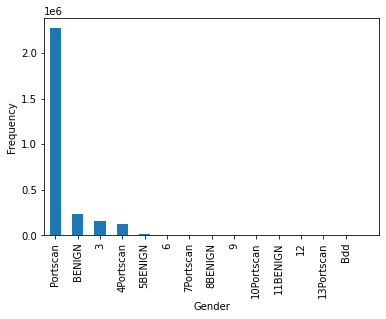

In [109]:
tag = df.groupby(' Label')[' Label'].agg('count')
print(tag)
target = df[' Label']
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], 
           ['Portscan','BENIGN', '3',                                    
            '4Portscan','5BENIGN', '6',
            '7Portscan','8BENIGN', '9',
            '10Portscan','11BENIGN', '12', 
            '13Portscan','Bdd' ])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.memory_usage(index=True).sum() 
import sys
sys.getsizeof(df)

1719151847

In [ ]:
print(df.shape)
print(df.columns)
print(df.info)
df.head(10)

del df['Fwd Avg Bytes/Bulk']
del df[' SYN Flag Count']
del df['Bwd Avg Bulk Rate']
del df[' RST Flag Count']
del df[' Fwd Avg Packets/Bulk']
del df[' Fwd Avg Bulk Rate']
del df[' ECE Flag Count']
del df[' CWE Flag Count']
del df[' Bwd URG Flags']
del df[' Bwd PSH Flags']
del df[' Bwd Avg Packets/Bulk']

(2830743, 79)
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [110]:
from sklearn.preprocessing import LabelEncoder

# target = df[' Label']
# le = LabelEncoder()
# Y=le.fit_transform(target)

# print(np.average(Y))
# X=df.iloc[:,:-1]
# X = X.astype(np.float16 ,copy=False)

# X = X.apply(lambda col: ((col - col.min(axis=0)) / col.max(axis=0)))
# X = target.apply(lambda col: SS.fit_transform(col), axis=0, result_type='expand')

# X.drop(X.columns[31], axis=1,inplace=True)
# X.drop(X.columns[32], axis=1,inplace=True)
# 52
# 53

# 56 --- nan
# 57 --- nan
# 58 --- nan
# 59 --- nan
# 60 --- nan
# 61 --- nan
# 62 --- 1.0
# 63 --- 1.0
# 64 --- 1.0
# 65 --- 1.0
# 66 --- 1.0
# 67 --- 1.0
# 68 --- 1.0
# 69 --- inf

# print(X.shape)
# X.dropna()
# print(X.shape,np.max(np.max(X).astype(np.float64)))
count = -1
for i in np.max(df).astype(np.float16):
    count += 1
    print(count, '---',i)

ValueError: ignored

In [111]:
X=df.iloc[:,:-1]
# X = X.apply(lambda col: (col.astype('float16')))

In [112]:
X.info()
X.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Destination Port            uint8  
 1    Flow Duration               uint8  
 2    Total Fwd Packets           uint8  
 3    Total Backward Packets      uint8  
 4   Total Length of Fwd Packets  int64  
 5    Fwd Packet Length Max       uint8  
 6    Fwd Packet Length Min       uint8  
 7    Fwd Packet Length Mean      uint8  
 8    Fwd Packet Length Std       uint8  
 9   Bwd Packet Length Max        uint8  
 10   Bwd Packet Length Min       uint8  
 11   Bwd Packet Length Mean      uint8  
 12   Bwd Packet Length Std       uint8  
 13  Flow Bytes/s                 uint8  
 14   Flow Packets/s              uint8  
 15   Flow IAT Mean               uint8  
 16   Flow IAT Std                uint8  
 17   Flow IAT Max                uint8  
 18   Flow IAT Min                uint8  
 19  

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
0,213,0,0,0,12,0,0,0,0,0,0,0,0,38,113,0,0,0,0,0,0,0,3,0,0,0,0,40,48,56,1,0,0,0,0,0,0,1,0,9,6,0.0,221,0,0,0,0,0,0,0,129,0,0,0,0
1,214,0,0,1,6,0,0,0,0,0,0,0,0,38,85,0,0,0,0,0,0,0,0,0,0,0,0,20,48,0,1,0,0,0,0,0,0,1,1,9,6,6.0,221,0,0,0,0,0,1,0,129,0,0,0,0
2,214,0,0,1,6,0,0,0,0,0,0,0,0,38,86,0,0,0,0,0,0,0,0,0,0,0,0,20,48,1,1,0,0,0,0,0,0,1,1,9,6,6.0,221,0,0,0,0,0,1,0,129,0,0,0,0
3,179,0,0,1,6,0,0,0,0,0,0,0,0,38,87,0,0,0,0,0,0,0,0,0,0,0,0,20,48,2,1,0,0,0,0,0,0,1,1,9,6,6.0,221,0,0,0,0,0,1,0,129,0,0,0,0
4,213,0,0,0,12,0,0,0,0,0,0,0,0,38,113,0,0,0,0,0,0,0,3,0,0,0,0,40,48,56,1,0,0,0,0,0,0,1,0,9,6,0.0,221,0,0,0,0,0,0,0,129,0,0,0,0
5,213,0,0,0,12,0,0,0,0,0,0,0,0,38,85,0,0,0,0,0,0,0,254,0,0,0,0,40,48,0,1,0,0,0,0,0,0,1,0,9,6,0.0,221,0,0,0,0,0,0,0,129,0,0,0,0
6,213,0,0,0,12,0,0,0,0,0,0,0,0,38,106,0,0,0,0,0,0,0,4,0,0,0,0,40,48,42,1,0,0,0,0,0,0,1,0,9,6,0.0,221,0,0,0,0,0,0,0,129,0,0,0,0
7,213,0,0,1,6,0,0,0,0,0,0,0,0,38,87,0,0,0,0,0,0,0,0,0,0,0,0,20,48,2,1,0,0,0,0,0,0,1,0,9,6,6.0,221,0,0,0,0,0,1,0,129,0,0,0,0
8,36,0,0,0,12,0,0,0,0,0,0,0,0,38,106,0,0,0,0,0,0,0,4,0,0,0,0,40,48,42,1,0,0,0,0,0,0,1,0,9,6,0.0,221,0,0,0,0,0,0,0,129,0,0,0,0
9,214,0,0,0,37,0,0,0,0,0,0,0,0,40,106,0,0,0,0,0,0,0,4,0,0,0,255,40,48,42,1,0,1,0,0,0,0,1,0,34,18,0.0,221,0,0,0,0,3,0,0,129,0,0,0,0


In [ ]:
print(X.head(10))
SS = LabelEncoder()
X = X.apply(lambda col: ((col - col.min(axis=0)) / col.max(axis=0)))
# X = X.apply(lambda col: (col.astype('int8')))

# X = X.apply(lambda col: SS.fit_transform(col), axis=0, result_type='expand')
X.head(10)

    Destination Port   Flow Duration  ...   Idle Max   Idle Min
0                 81               3  ...          0          0
1                 14             109  ...          0          0
2                 15              52  ...          0          0
3               -100              34  ...          0          0
4                 79               3  ...          0          0
5                 87              -2  ...          0          0
6               -115               4  ...          0          0
7               -115              42  ...          0          0
8                 66               4  ...          0          0
9                113               4  ...          0          0

[10 rows x 65 columns]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Bwd Avg Bytes/Bulk,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.370079,-0.984252,-0.992126,-1.007874,-0.913386,-1.007874,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-0.984252,-1.007874,-0.984252,-0.984252,-0.984252,-0.984252,-1.007874,-0.984252,-0.984252,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,0.0,0.0,-0.709677,-1.032258,-0.677165,-1.007874,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,0.0,0.0,1.0,0.0,0.806452,-0.937008,-0.960630,-1.007874,-0.709677,NaN,-0.992126,-0.913386,-1.007874,-1.007874,-0.748031,1.000000,-1.000000,-0.936508,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874
1,-0.897638,-0.149606,-1.000000,-1.000000,-0.960630,-0.960630,-0.96063,-0.96063,-0.960630,-1.007874,-0.960630,-0.960630,-0.960630,-1.007874,-0.149606,-1.007874,-0.149606,-0.149606,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,0.0,0.0,-0.870968,-0.870968,0.677165,0.677165,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,0.0,0.0,1.0,1.0,0.814516,-0.937008,-0.960630,-0.960630,-0.870968,NaN,-1.000000,-0.960630,-1.000000,-0.960630,-0.779528,-1.007874,-1.007874,-0.936508,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874
2,-0.889764,-0.598425,-1.000000,-1.000000,-0.960630,-0.960630,-0.96063,-0.96063,-0.960630,-1.007874,-0.960630,-0.960630,-0.960630,-1.007874,-0.598425,-1.007874,-0.598425,-0.598425,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,0.0,0.0,-0.870968,-0.870968,-0.771654,-0.771654,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,0.0,0.0,1.0,1.0,0.814516,-0.937008,-0.960630,-0.960630,-0.870968,NaN,-1.000000,-0.960630,-1.000000,-0.960630,-0.779528,-1.007874,-1.007874,-0.936508,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874
3,0.220472,-0.740157,-1.000000,-1.000000,-0.960630,-0.960630,-0.96063,-0.96063,-0.960630,-1.007874,-0.960630,-0.960630,-0.960630,-1.007874,-0.740157,-1.007874,-0.740157,-0.740157,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,0.0,0.0,-0.870968,-0.870968,0.779528,0.779528,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,0.0,0.0,1.0,1.0,0.814516,-0.937008,-0.960630,-0.960630,-0.870968,NaN,-1.000000,-0.960630,-1.000000,-0.960630,-0.763780,-0.433071,-1.007874,-0.936508,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874
4,-0.385827,-0.984252,-0.992126,-1.007874,-0.913386,-1.007874,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,-0.984252,-1.007874,-0.984252,-0.984252,-0.984252,-0.984252,-1.007874,-0.984252,-0.984252,-1.007874,-1.007874,-1.007874,-1.007874,-1.007874,0.0,0.0,-0.709677,-1.032258,-0.677165,-1.007874,-0.96063,-0.96063,-0.960630,-1.007874,-1.007874,0.0,0.0,1.0,0.0,0.806452,-0.937008,-0.960630,-1.007874,-0.709677,NaN,-0.992126,-0.913386,-1.007874,-1.007874,-0.755906

In [ ]:
Y.sample(10)

AttributeError: ignored

In [113]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(2262300, 55) 2262300 (565576, 55) 565576


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Max',
       'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd

In [ ]:

# y_train = y_train.apply(lambda col: (col.astype('float16')))
# for col in len(range(y_train)):
#   y_train[col] = y_train[col].astype('int8') 


In [ ]:
type(y_train[0])

numpy.int64

In [114]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [115]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)


# without removing low importance features
# [(0.06725226795705366, ' PSH Flag Count'
#  (0.04703924588265128, ' Destination Port'
#  (0.04336891200076948, ' min_seg_size_forward'
#  (0.032918258942460234, ' Avg Bwd Segment Size'
#  (0.0319151585200045, 'Init_Win_bytes_forward,
#  (0.031231904998846597, ' Bwd Packet Length Mn'),
#  (0.031043828667534953, 'Bwd Packet Length Max'),
#  (0.031022820331145052, ' Bwd Packet Length Min'),
#  (0.03084828251761542, ' Bwd Packet Length Std'),
#  (0.03072821850388161, ' Packet Length Std'),
#  (0.030100785213065997, ' Flow IAT Max'),
#  (0.028436521776347194, ' ACK Flag Count'),
#  (0.027281427074497808, ' Average Packet Size'),
#  (0.026910672034640138, ' Packet Length Mean'),
#  (0.026513534635049307, ' Fwd IAT Std'),
#  (0.02519386171930337, ' Idle Min'),
#  (0.02469951817650592, ' Packet Length Variance'),
#  (0.022650719915733662, ' Fwd IAT Max'),
#  (0.02149375931208453, 'Idle Mean'),
#  (0.021387643727711243, ' Idle Max'),
#  (0.019695679851880293, 'Fwd IAT Total'),
#  (0.018349326562034977, 'Fwd Packets/s'),
#  (0.017266255918316865, ' Min Packet Length'),
#  (0.015626674633139576, ' Flow Duration'),
#  (0.014118829080722541, ' Flow IAT Std'),
#  (0.013867841856553067, ' act_data_pkt_fwd'),
#  (0.013679521187193299, ' Fwd Packet Length Mean'),
#  (0.01331099626769552, ' Down/Up Ratio'),
#  (0.012939464770070725, ' Max Packet Length'),
#  (0.012047217861556263, 'Subflow Fwd Packets'),
#  (0.011862095567088867, ' Fwd IAT Mean'),
#  (0.011632402475019983, ' Fwd Header Length'),
#  (0.011358750784500476, ' Fwd Header Length.1'),
#  (0.010854538908848051, ' Fwd Packet Length Min'),
#  (0.010796586010746973, ' URG Flag Count'),
#  (0.009597693510985581, ' Fwd Packet Length Std'),
#  (0.00902441333452618, 'FIN Flag Count'),
#  (0.00877306577163478, ' Fwd Packet Length Max'),
#  (0.008720890407471942, ' Flow IAT Mean'),
#  (0.008226787320041931, ' Bwd Header Length'),
#  (0.007201896418642561, 'Bwd IAT Total'),
#  (0.0069803806388032096, ' Bwd IAT Max'),
#  (0.006945103049020648, ' Avg Fwd Segment Size'),
#  (0.0069378669203904566, ' Fwd IAT Min'),
#  (0.006887325250458923, ' Total Backward Packets'),
#  (0.006841765990321557, ' Init_Win_bytes_backward'),
#  (0.006626668993186727, ' Subflow Bwd Packets'),
#  (0.006300917761674071, ' Total Fwd Packets'),
#  (0.006126555533887571, ' Subflow Bwd Bytes'),
#  (0.00578242343095683, ' Total Length of Bwd Packets'),
#  (0.005532007932318445, ' Flow IAT Min'),
#  (0.005470814956938054, ' Subflow Fwd Bytes'),
#  (0.00510055920240283, ' Bwd IAT Mean'),
#  (0.004828698367963238, ' Bwd Packets/s'),
#  (0.004661449246139643, ' SYN Flag Count'),
#  (0.004656945025439365, 'Total Length of Fwd Packets'),
#  (0.004444226295005339, ' Bwd IAT Std'),
#  (0.004222930071229493, 'Fwd PSH Flags'),
#  (0.002980876838669248, ' Idle Std'),
#  (0.0022653559832381213, ' Bwd IAT Min'),
#  (0.0020928688268832575, ' Active Min'),
#  (0.001723731080556255, 'Active Mean'),
#  (0.0013829157201535125, ' Active Max'),
#  (0.00020451284954848723, ' Active Std'),
#  (9.758497430937929e-06, ' CWE Flag Count'),
#  (3.2564982464166172e-06, ' Fwd URG Flags'),
#  (1.447782419664425e-06, ' ECE Flag Count'),
#  (3.668511452909695e-07, ' RST Flag Count'),
#  (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# ---------------------------------------------------------


# [(0.07310365579399741, ' PSH Flag Count'),
#  (0.046475815101709984, ' min_seg_size_forward'),
#  (0.045934770085670394, ' Destination Port'),
#  (0.04354801440171562, ' Avg Bwd Segment Size'),
#  (0.03856424646770225, ' Packet Length Std'),
#  (0.032581428295322824, 'Bwd Packet Length Max'),
#  (0.0304329734798864, ' Fwd IAT Std'),
#  (0.030004556066805278, 'Init_Win_bytes_forward'),
#  (0.02853429675537719, ' Bwd Packet Length Std'),
#  (0.027345633541044186, ' Bwd Packet Length Min'),
#  (0.026739433752677427, ' Average Packet Size'),
#  (0.026495206853878427, ' Packet Length Variance'),
#  (0.02535343343555042, ' ACK Flag Count'),
#  (0.02489962913912783, ' Packet Length Mean'),
#  (0.024063577466096442, ' Bwd Packet Length Mean'),
#  (0.022537784746346854, ' Idle Min'),
#  (0.022425677268801836, ' Idle Max'),
#  (0.021089457479274577, 'Fwd Packets/s'),
#  (0.020905120110969577, ' Fwd IAT Max'),
#  (0.020308971281282315, ' Flow IAT Max'),
#  (0.018813700501907404, 'Idle Mean'),
#  (0.018067791682025974, ' act_data_pkt_fwd'),
#  (0.01802237237287912, ' Max Packet Length'),
#  (0.017997843113228613, ' Min Packet Length'),
#  (0.017872511846361218, 'Fwd IAT Total'),
#  (0.017520951239622197, ' Flow IAT Std'),
#  (0.014881886721889226, ' Down/Up Ratio'),
#  (0.012914199615944012, ' Avg Fwd Segment Size'),
#  (0.012055797186893941, ' Flow Duration'),
#  (0.011631295140734983, ' Total Fwd Packets'),
#  (0.01107404719278104, 'Subflow Fwd Packets'),
#  (0.011006568007510521, ' URG Flag Count'),
#  (0.010921003583136375, ' Fwd Packet Length Std'),
#  (0.010356449469914123, ' Fwd Packet Length Mean'),
#  (0.01033395657536567, ' Fwd Header Length'),
#  (0.009830207428205373, ' Fwd IAT Mean'),
#  (0.009774355533804582, ' Fwd Packet Length Max'),
#  (0.009240395689139726, ' Fwd Header Length.1'),
#  (0.008618886892888398, ' Fwd Packet Length Min'),
#  (0.008352315753258288, 'Fwd PSH Flags'),
#  (0.007965808032871996, 'Total Length of Fwd Packets'),
#  (0.007922605037918536, ' Flow IAT Mean'),
#  (0.007318878754666738, 'Bwd IAT Total'),
#  (0.00675529351791052, 'FIN Flag Count'),
#  (0.006711274017472827, ' Subflow Bwd Packets'),
#  (0.006608910345913243, ' Bwd Header Length'),
#  (0.006242128250044523, ' Flow IAT Min'),
#  (0.006076130445719157, ' Subflow Fwd Bytes'),
#  (0.0059547031747178595, ' Init_Win_bytes_backward'),
#  (0.005889936504748974, ' Fwd IAT Min'),
#  (0.0058352876533357325, ' Total Backward Packets'),
#  (0.004719200925616161, ' Bwd IAT Max'),
#  (0.004436353459315346, ' Subflow Bwd Bytes'),
#  (0.004288540951000902, ' Bwd IAT Mean'),
#  (0.003736318063867649, ' Bwd Packets/s'),
#  (0.0035537665999495686, ' Bwd IAT Std'),
#  (0.0034097276914085944, ' Idle Std'),
#  (0.003350737930263424, ' Total Length of Bwd Packets'),
#  (0.002778802459990596, 'Active Mean'),
#  (0.002086141001009315, ' Active Min'),
#  (0.001986387335518348, ' Active Max'),
#  (0.0015935378649943417, ' Bwd IAT Min'),
#  (0.000138307198711042, ' Active Std'),
#  (1.1005712306563672e-05, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]




[(0.06690100667896441, ' PSH Flag Count'),
 (0.058216087779977325, ' Destination Port'),
 (0.04861332355550372, ' min_seg_size_forward'),
 (0.04806183464065997, ' Avg Bwd Segment Size'),
 (0.04453371445806573, ' Average Packet Size'),
 (0.04255847124833064, ' Packet Length Std'),
 (0.038802730583122946, ' Bwd Packet Length Mean'),
 (0.03726604669718304, ' Fwd IAT Max'),
 (0.033130227855284175, ' Fwd IAT Std'),
 (0.031657894941570626, 'Idle Mean'),
 (0.029700974282850928, 'Init_Win_bytes_forward'),
 (0.029622252495992103, ' Idle Max'),
 (0.028765344515707197, ' Avg Fwd Segment Size'),
 (0.02833319672239302, ' Flow IAT Max'),
 (0.02756093527388941, ' Fwd Header Length'),
 (0.0269162747917426, ' Bwd Packet Length Std'),
 (0.026470866149284136, ' ACK Flag Count'),
 (0.02549206830249687, 'Bwd Packet Length Max'),
 (0.021708599173531434, ' Packet Length Mean'),
 (0.019101943160504616, 'Fwd Packets/s'),
 (0.018998546558886865, ' Packet Length Variance'),
 (0.01857977733946383, ' Flow Duration

In [116]:
y_pred = model.predict(x_test)
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [117]:
from sklearn.metrics import accuracy_score,f1_score
print(model.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

# 0.9984173777574454
# 0.9984173777574454
# 0.8329280909957083
# --------After removal of columns
# 0.9984350409521169--------
# 0.9984350409521169--------
# 0.8395713515182087
# -------------- After removal of columns and standardization of data
# 0.9983591948738985
# 0.9983591948738985
# 0.8782021432415873


0.996605230773583
0.996605230773583
0.8037094062777358


In [ ]:
x_train.sample(20)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
187650,0.122072,5.543199,5,0,30,6,6,6.000000,0.000000,0,0,0.00000,0.000000,11.192110,33.333347,1.385808,3.918124,5,0,5.543188e+00,1.385797e+00,3.927263,6646825,0.000012,0,0,0,100,99.459190,0.000025,6,6,6.000000,0.000000,0.000000,0,0,1,0,7.200000,6.000000,0.000000,99.985580,5,30,0,0.000000e+00,0.392151,0.000000,4,99.999977,5.539062,0.000000,5,6646825
276227,0.675975,0.218747,8,9,944,596,0,118.000000,206.690933,2920,0,1016.00000,1013.510742,11.193758,33.334412,0.013682,0.023217,0,0,2.185825e-01,3.122607e-02,0.028505,80939,0.007943,232437,139489,0,172,99.459213,0.001016,0,2920,560.444458,849.380798,3.220749,0,1,0,0,593.411743,118.000000,1016.000000,99.985580,8,944,9,1.395066e-03,12.501526,0.202942,7,99.999977,0.000000,0.000000,0,0
712592,0.675975,0.770857,8,8,2725,2413,0,340.625000,840.954529,845,2,130.00000,290.403656,11.192285,33.333622,0.051401,0.113380,0,0,6.985525e-01,9.979321e-02,0.148705,379769,0.000012,838288,466547,0,180,99.459206,0.000288,0,2413,221.470581,600.538208,1.610027,0,1,0,0,235.312500,340.625000,130.000000,99.985580,8,2725,8,1.586689e-04,44.557190,62.498474,7,99.999977,0.000000,0.000000,0,0
273596,11.580072,0.000012,2,0,12,6,6,6.000000,0.000000,0,0,0.00000,0.000000,11.706690,66.666664,0.000012,0.000000,0,0,8.333333e-07,8.333333e-07,0.000000,1,0.000011,0,0,0,40,99.459190,66.666664,6,6,6.000000,0.000000,0.000000,0,0,1,0,9.000000,6.000000,0.000000,99.985580,2,12,0,0.000000e+00,0.576782,0.000000,1,99.999977,0.000000,0.000000,0,0
2259315,0.122072,69.075386,9,7,379,373,0,42.111111,124.099197,5792,0,1656.00000,2118.227295,11.192116,33.333336,4.605036,25.235771,68,0,6.900000e+01,8.583333e+00,34.632370,82700000,0.000011,148735,137191,0,284,99.459213,0.000004,0,5792,704.352966,1537.710449,10.556042,0,0,1,0,748.375000,42.111111,1656.428571,99.985580,9,379,7,1.769005e-03,0.384521,0.360107,2,99.999977,68.937500,0.000000,68,82700000
2434072,0.122072,83.887154,6,6,383,371,0,63.833332,150.509018,8688,0,1932.00000,3506.021729,11.192115,33.333336,7.626114,35.377251,82,0,8.416666e+01,1.675000e+01,52.480453,99500000,0.000013,101000000,101000000,0,184,99.459213,0.000002,0,8688,921.846130,2465.742432,27.142345,1,0,0,0,998.666687,63.833332,1932.500000,99.985580,6,383,6,1.769005e-03,0.001526,0.360107,2,99.999977,82.937500,0.000000,82,99500000
1756558,0.675975,98.488564,28,33,1134,517,0,40.500000,133.179489,2836,0,741.50000,793.024841,11.192119,33.333344,1.641487,4.605752,8,0,9.833334e+01,3.647725e+00,5.788192,10100000,0.000012,113000000,10100000,0,904,99.459290,0.000008,0,2836,412.983856,680.177856,2.065366,0,1,0,0,419.754089,40.500000,741.545455,99.985588,28,1134,33,3.733448e-03,44.557190,0.534058,4,99.999977,8.335938,0.005124,8,10000000
725140,0.675975,0.644943,6,5,958,517,0,159.666672,231.960922,137,0,33.59375,59.340542,11.192172,33.333569,0.064504,0.146250,0,0,4.300183e-01,8.600367e-02,0.166159,257347,0.000108,516951,258896,0,200,99.459206,0.000258,0,517,93.833336,174.789139,0.136389,0,1,0,0,102.363640,159.666672,33.600000,99.985580,6,958,5,2.563113e-05,44.557190,0.372314,3,99.999977,0.000000,0.0000

In [ ]:
# (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# del df[" CWE Flag Count"]
# del df["Bwd Avg Bulk Rate"]
# del df[" Fwd Avg Packets/Bulk"]
# del df[' Fwd Avg Bulk Rate']
# del df[" Bwd URG Flags"]
# del df[' Bwd PSH Flags']
# del df[" Bwd Avg Packets/Bulk"]
                                                                       
# del df[" SYN Flag Count"]
# del df[" Fwd URG Flags"]
# del df["]
# del df[""]
# del df[""]
# del df[""]
# del df[""]
# 
# 
# 
# 
#  -----------------------DTC
#  (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' SYN Flag Count'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd URG Flags'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' CWE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]
# RF
  # (0.0, 'Fwd Avg Bytes/Bulk'),
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

# 'Fwd Avg Bytes/Bulk'),
# SYN Flag Count')
#  (0.0, 'Bwd Avg Bulk Rate'),
#  (0.0, ' RST Flag Count'),
#  (0.0, ' Fwd Avg Packets/Bulk'),
#  (0.0, ' Fwd Avg Bulk Rate'),
#  (0.0, ' ECE Flag Count'),
#  (0.0, ' CWE Flag Count'),
#  (0.0, ' Bwd URG Flags'),
#  (0.0, ' Bwd PSH Flags'),
#  (0.0, ' Bwd Avg Packets/Bulk'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]


In [ ]:
len(df.columns)

67

In [118]:
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y_pred

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [119]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
# -----------------------------
# 0.9984774326193281 after removal of columns
# 0.9984774326193281 after removal of columns
# 0.8667124765500696 after removal of columns

# ------------------------------------------ AFter removal of columns and standardization of data
# 0.9984140062520334
# 0.9984140062520334
# 0.9004401619867812

0.9965451150685319
0.9965451150685319
0.7985818024194927


In [120]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)
# ''' After removal of columns
# [(0.28016606811168726, ' Bwd Packet Length Std'),
#  (0.1733888947694944, ' Average Packet Size'),
#  (0.12351004475960135, ' Packet Length Variance'),
#  (0.11069568307466329, ' Fwd Packet Length Max'),
#  (0.09594752849111146, ' Destination Port'),
#  (0.06755557795314726, ' Flow IAT Std'),
#  (0.03493801525095952, ' Flow IAT Mean'),
#  (0.01883046832986224, 'Init_Win_bytes_forward'),
#  (0.018112034535505223, ' Fwd Header Length.1'),
#  (0.015792768068831394, ' Total Length of Bwd Packets'),
#  (0.007670806775145387, ' PSH Flag Count'),
#  (0.007375691302249404, ' Flow IAT Min'),
#  (0.007053658583930834, ' Fwd IAT Min'),
#  (0.006798316543684104, ' Init_Win_bytes_backward'),
#  (0.003698208209551507, ' Bwd IAT Mean'),
#  (0.003231974871338103, ' Bwd Packets/s'),
#  (0.0028835305365681294, ' Fwd IAT Std'),
#  (0.002531178337354747, ' Packet Length Mean'),
#  (0.0020148741561211853, ' Subflow Fwd Bytes'),
#  (0.001849292133856775, ' Active Std'),
#  (0.0017756112815919029, ' Subflow Bwd Bytes'),
#  (0.0017422225064747804, ' Bwd IAT Std'),
#  (0.001735979999222193, ' min_seg_size_forward'),
#  (0.0014089051417732659, ' act_data_pkt_fwd'),
#  (0.001039001917198709, ' Fwd Header Length'),
#  (0.0008479153051474898, ' Bwd Packet Length Mean'),
#  (0.0007103968653167402, ' Flow Duration'),
#  (0.0005975280224517197, ' Fwd IAT Mean'),
#  (0.0005879066183263844, ' Fwd Packet Length Min'),
#  (0.00048147632219934565, ' Avg Fwd Segment Size'),
#  (0.00046751665611389034, ' Avg Bwd Segment Size'),
#  (0.00046193767822552304, ' Fwd Packet Length Std'),
#  (0.0004135138254924596, 'Total Length of Fwd Packets'),
#  (0.00041328739480660486, ' Flow IAT Max'),
#  (0.00030597314465320984, 'Subflow Fwd Packets'),
#  (0.00026962660081438633, ' Min Packet Length'),
#  (0.00026572709485670224, ' URG Flag Count'),
#  (0.00025500760488335724, 'Fwd IAT Total'),
#  (0.00023741983955396956, ' Bwd IAT Min'),
#  (0.00021367862064914888, 'Fwd Packets/s'),
#  (0.00018878988623811886, ' Fwd IAT Max'),
#  (0.00018270426067764855, 'Bwd Packet Length Max'),
#  (0.00015394740150137702, 'Fwd PSH Flags'),
#  (0.00015233484758006682, 'Bwd IAT Total'),
#  (0.00014963252434221794, ' Down/Up Ratio'),
#  (0.00011460363907694974, ' ACK Flag Count'),
#  (0.00011027266081469523, ' Subflow Bwd Packets'),
#  (0.00010582054978144025, ' Packet Length Std'),
#  (0.00010059309850460571, ' Max Packet Length'),
#  (9.414921214447345e-05, ' Idle Min'),
#  (7.941917652496808e-05, ' Total Backward Packets'),
#  (6.328853154705063e-05, ' Fwd Packet Length Mean'),
#  (5.221072466639542e-05, ' Active Max'),
#  (3.774487080623856e-05, ' Bwd IAT Max'),
#  (3.4065258530539905e-05, ' Idle Std'),
#  (3.204165726561617e-05, ' Bwd Header Length'),
#  (1.975936604384112e-05, 'FIN Flag Count'),
#  (1.9724799376597006e-05, ' Total Fwd Packets'),
#  (1.445375939585674e-05, ' Idle Max'),
#  (6.626751842307504e-06, ' Active Min'),
#  (6.228453832736674e-06, 'Active Mean'),
#  (4.623810405522742e-06, ' Bwd Packet Length Min'),
#  (1.7175246854056034e-06, 'Idle Mean'),
#  (0.0, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')] '''


# After removal of columns and stardardization of data
# [(0.28081615120727976, ' Bwd Packet Length Std'),
#  (0.17342584039345477, ' Average Packet Size'),
#  (0.12443267029574392, ' Packet Length Variance'),
#  (0.11023026556712232, ' Fwd Packet Length Max'),
#  (0.09746895785153119, ' Destination Port'),
#  (0.06745392528933074, ' Flow IAT Std'),
#  (0.03451220274130996, ' Flow IAT Mean'),
#  (0.019190152548959546, ' Fwd Header Length'),
#  (0.017462324426230795, ' Subflow Bwd Bytes'),
#  (0.017459279711913734, 'Init_Win_bytes_forward'),
#  (0.007414904307686484, ' PSH Flag Count'),
#  (0.006700317437963121, ' Init_Win_bytes_backward'),
#  (0.006663308257260486, ' Fwd IAT Min'),
#  (0.006044352514880975, 'Idle Mean'),
#  (0.005355512124356029, ' min_seg_size_forward'),
#  (0.0036568915883058235, ' Packet Length Mean'),
#  (0.0034312123976469504, ' Idle Std'),
#  (0.0028462804526412193, ' Fwd IAT Mean'),
#  (0.002602149646224776, ' Bwd Packet Length Mean'),
#  (0.0014574049358381167, 'Fwd Packets/s'),
#  (0.001144727323678923, ' Fwd Packet Length Mean'),
#  (0.0009776331906792724, ' Flow Duration'),
#  (0.0009776052620744666, ' Avg Bwd Segment Size'),
#  (0.0009451194161910165, ' Flow IAT Min'),
#  (0.0008056073797510606, ' Fwd IAT Std'),
#  (0.0008041586301102237, ' Subflow Fwd Bytes'),
#  (0.0007283035349229918, ' Max Packet Length'),
#  (0.0005657124060944584, 'Bwd Packet Length Max'),
#  (0.0005470064893224677, 'Total Length of Fwd Packets'),
#  (0.00047975391134993305, ' Fwd Packet Length Std'),
#  (0.00047771592488278036, ' Fwd IAT Max'),
#  (0.00037293438198067377, ' Fwd Packet Length Min'),
#  (0.00030169869211160504, 'Flow Bytes/s'),
#  (0.00028136749737304843, ' Min Packet Length'),
#  (0.000273780967577527, ' Idle Min'),
#  (0.00020469376312760802, ' URG Flag Count'),
#  (0.00018746746412100034, ' Bwd IAT Max'),
#  (0.0001790807723947673, ' Subflow Bwd Packets'),
#  (0.00017207570059626418, ' ACK Flag Count'),
#  (0.00016162335200744376, ' Flow Packets/s'),
#  (0.00015204646779520066, ' Total Backward Packets'),
#  (0.00015203629652474893, ' Packet Length Std'),
#  (0.0001425175604447684, 'Fwd PSH Flags'),
#  (9.503481344511872e-05, 'FIN Flag Count'),
#  (8.928384850564696e-05, 'Bwd IAT Total'),
#  (5.9174596124725984e-05, ' Avg Fwd Segment Size'),
#  (3.2795406148957585e-05, 'Subflow Fwd Packets'),
#  (1.6901180938118678e-05, ' Total Fwd Packets'),
#  (1.2790231641322964e-05, ' Idle Max'),
#  (1.0136842077547119e-05, ' Flow IAT Max'),
#  (8.902492042750681e-06, ' Bwd Header Length'),
#  (8.493611656901823e-06, ' act_data_pkt_fwd'),
#  (7.716896626203414e-06, ' Bwd Packet Length Min'),
#  (0.0, 'Fwd IAT Total'),
#  (0.0, ' Fwd Header Length.1')]


 


[(0.2841986687385719, ' Bwd Packet Length Std'),
 (0.1205062740170743, ' Average Packet Size'),
 (0.11226953333492203, ' Avg Bwd Segment Size'),
 (0.10739965783960106, 'Total Length of Fwd Packets'),
 (0.09785351344591915, ' Total Backward Packets'),
 (0.07233203131516476, ' Min Packet Length'),
 (0.05529314115453851, ' Destination Port'),
 (0.03630655122223505, 'Fwd Packets/s'),
 (0.013242193017545584, ' Fwd Header Length'),
 (0.012428438875777277, ' Flow IAT Max'),
 (0.012147270876081829, ' Init_Win_bytes_backward'),
 (0.011285773419572081, ' Packet Length Mean'),
 (0.01013688836205035, ' Fwd IAT Max'),
 (0.005807709516039644, 'Idle Mean'),
 (0.00561459872965805, 'Fwd PSH Flags'),
 (0.005496011744640998, 'FIN Flag Count'),
 (0.004894725169502786, ' PSH Flag Count'),
 (0.004525055352380332, 'Init_Win_bytes_forward'),
 (0.003992293632705794, ' min_seg_size_forward'),
 (0.003990039286765114, ' Fwd IAT Std'),
 (0.0036360207527965202, 'Bwd IAT Total'),
 (0.002526940953714889, ' Flow IAT M

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(dtc,X,Y,cv=10)
# array([0.97643734, 0.99840325, 0.99742471, 0.99876711, 0.99574316,
      #  0.99814536, 0.99919809, 0.9984845 , 0.99836439, 0.98740612])

array([0.97643734, 0.99840325, 0.99742471, 0.99876711, 0.99574316,
       0.99814536, 0.99919809, 0.9984845 , 0.99836439, 0.98740612])

In [121]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))
# 0.9985904770652249

---------------------------Random Forest CLassifier------------------
0.9964461009660948


In [122]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)
# After removal of zero weight columns
# (0.112366494671202, ' Bwd Packet Length Std'),
#  (0.06433679659855031, ' Fwd Packet Length Max'),
#  (0.056751604919560494, ' Bwd Header Length'),
#  (0.053961465096857064, ' Packet Length Std'),
#  (0.05211168968251292, ' Avg Bwd Segment Size'),
#  (0.04711769474558417, ' Packet Length Variance'),
#  (0.047111200354155815, ' Destination Port'),
#  (0.04381627786972093, ' Bwd Packets/s'),
#  (0.042386429958200925, ' Subflow Fwd Bytes'),
#  (0.04204987126438914, ' Subflow Bwd Bytes'),
#  (0.04094738171388945, ' Fwd Packet Length Mean'),
#  (0.034804649193391636, ' Bwd Packet Length Mean'),
#  (0.032309913776511615, 'Total Length of Fwd Packets'),
#  (0.030449813998609403, ' Bwd Packet Length Min'),
#  (0.02745081831343994, 'Init_Win_bytes_forward'),
#  (0.02152068692183791, ' Avg Fwd Segment Size'),
#  (0.020606145634675384, ' Total Fwd Packets'),
#  (0.020281391542833906, ' Fwd Header Length'),
#  (0.019122836450544096, ' Average Packet Size'),
#  (0.017856029235357555, ' Fwd IAT Min'),
#  (0.016114650228562403, ' Total Length of Bwd Packets'),
#  (0.01511369436086099, ' Flow IAT Mean'),
#  (0.01462071528436822, 'Bwd Packet Length Max'),
#  (0.013104362732868127, ' Fwd IAT Std'),
#  (0.012588503895913216, ' Fwd Header Length.1'),
#  (0.010829394542185674, ' Flow Duration'),
#  (0.010589833636965276, 'Subflow Fwd Packets'),
#  (0.008664120438680232, ' Flow IAT Min'),
#  (0.006618671803804302, ' Fwd IAT Mean'),
#  (0.0062142762806988204, 'Fwd Packets/s'),
#  (0.005823333750440481, ' Flow IAT Max'),
#  (0.005511802056849195, ' Flow IAT Std'),
#  (0.004975819470764161, 'Bwd IAT Total'),
#  (0.004627758535310539, ' Fwd IAT Max'),
#  (0.00427590994074193, ' Packet Length Mean'),
#  (0.0035639700897044913, ' act_data_pkt_fwd'),
#  (0.003493204652573267, ' Init_Win_bytes_backward'),
#  (0.003374753383737507, ' PSH Flag Count'),
#  (0.002515781500541767, 'Idle Mean'),
#  (0.0024516354845426636, ' min_seg_size_forward'),
#  (0.0022335619575645444, ' ACK Flag Count'),
#  (0.0019732395805961366, ' Fwd Packet Length Min'),
#  (0.0014831160895369868, 'Fwd IAT Total'),
#  (0.0014772666869454546, ' Bwd IAT Min'),
#  (0.0013384636148983016, ' Active Max'),
#  (0.0012520161369063434, 'FIN Flag Count'),
#  (0.0011475731461011319, ' Subflow Bwd Packets'),
#  (0.0010386363262575413, ' Idle Min'),
#  (0.0009966626895916914, ' Fwd Packet Length Std'),
#  (0.0008592233719482215, ' Max Packet Length'),
#  (0.0006909782162334799, ' Idle Std'),
#  (0.0006473875360388798, ' URG Flag Count'),
#  (0.0006114456684819397, ' Bwd IAT Max'),
#  (0.00036808559597668086, ' Bwd IAT Mean'),
#  (0.0003629025503343455, ' Active Std'),
#  (0.00029293235026810893, ' Idle Max'),
#  (0.00025669564002782765, ' Min Packet Length'),
#  (0.00017962329022629367, 'Fwd PSH Flags'),
#  (0.00011231918372564187, ' Total Backward Packets'),
#  (8.998730128113458e-05, ' Bwd IAT Std'),
#  (7.53315373177969e-05, ' Down/Up Ratio'),
#  (3.7701044193251527e-05, ' Active Min'),
#  (3.760200258525163e-05, 'Active Mean'),
#  (5.86447102523287e-06, ' Fwd URG Flags'),
#  (0.0, ' Bwd Avg Bytes/Bulk')]

[(0.145025745627561, ' Packet Length Variance'),
 (0.06267163493604241, ' Destination Port'),
 (0.0613918930084727, ' PSH Flag Count'),
 (0.0587190302579525, ' Avg Bwd Segment Size'),
 (0.05567222321678052, 'Bwd Packet Length Max'),
 (0.05363953853421155, ' Fwd IAT Max'),
 (0.05134533203335825, 'Total Length of Fwd Packets'),
 (0.05109128945754957, ' Fwd Packet Length Std'),
 (0.03675270238645671, 'Init_Win_bytes_forward'),
 (0.036362303411364885, ' Fwd Header Length'),
 (0.03456560673549618, ' Avg Fwd Segment Size'),
 (0.0322907394110563, ' Bwd Packet Length Min'),
 (0.03165224756469898, ' Flow IAT Mean'),
 (0.027649571191133194, 'Fwd Packets/s'),
 (0.027577997989101884, ' min_seg_size_forward'),
 (0.027526175213779196, ' Packet Length Std'),
 (0.022985435197068013, ' Fwd Packet Length Max'),
 (0.01622232951297151, ' Average Packet Size'),
 (0.0157778643055697, ' Max Packet Length'),
 (0.015208580293901819, ' Fwd IAT Std'),
 (0.014542295433024191, ' ACK Flag Count'),
 (0.0139264705846

In [123]:
from sklearn.metrics import accuracy_score,f1_score
print(model.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

# 0.9985904770652249
# 0.9984774326193281
# 0.8667124765500696

# 0.9984971073737217
# 0.9984140062520334
# 0.9004401619867812

# After normalization and removal of columns
# 0.9964461009660948
# 0.9965451150685319
# 0.7985818024194927


0.9964461009660948
0.9965451150685319
0.7985818024194927


In [ ]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
0,83.718624,0.000013,2,0,12,6,6,6.0,0.0,0,0,0.0,0.0,11.363636,44.444443,0.000013,0.0,0,0,0.0,0.000002,0.0,3,0.000012,0,0,0,40,99.459190,22.222221,6,6,6.0,0.0,0.0,0,0,1,0,9.0,6.0,0.0,99.98558,2,12,0,0.000000e+00,0.051880,0.000000,1,99.999977,0.0,0.0,0,0
1,84.007019,0.000102,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.196831,33.639145,0.000102,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.305810,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.045776,0.392151,0,99.999977,0.0,0.0,0,0
2,84.008545,0.000054,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.202005,33.974358,0.000054,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.641026,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.045776,0.392151,0,99.999977,0.0,0.0,0,0
3,70.551614,0.000039,1,1,6,6,6,6.0,0.0,6,6,6.0,0.0,11.207245,34.313725,0.000039,0.0,0,0,0.0,0.000000,0.0,0,0.000010,0,0,0,20,99.459198,0.980392,6,6,6.0,0.0,0.0,0,0,1,1,9.0,6.0,6.0,99.98558,1,6,1,9.153974e-07,0.048828,0.503540,0,99.999977,0.0,0.0,0,0
4,83.715572,0.000013,2,0,12,6,6,6.0,0.0,0,0,0.0,0.0,11.363636,44.444443,0.000013,0.0,0,0,0.0,0.000002,0.0,3,0.000012,0,0,0,40,99.459190,22.222221,6,6,6.0,0.0,0.0,0,0,1,0,9.0,6.0,0.0,99.98558,2,12,0,0.000000e+00,0.050354,0.000000,1,99.999977,0.0,0.0,0,0


In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [128]:
l = X.values
len(l)

2827876

In [125]:
target

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
2830738    BENIGN
2830739    BENIGN
2830740    BENIGN
2830741    BENIGN
2830742    BENIGN
Name:  Label, Length: 2827876, dtype: object

In [ ]:
# string
# df.new_col = string
len(ll[3])
ll[1]

'1091550541091166666.00.0666.00.0110091.743118348.62385109.00.010910900.00.00000.00.0000020209174.3119269999999174.311926999999666.00.00.0001119.06.06.0201616292560200.00.0000.00.000'

In [ ]:
df['new']

In [ ]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,1,0,0,9.0,6.0,0.0,40,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,1,1,1,9.0,6.0,6.0,20,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,1,0,0,9.0,6.0,0.0,40,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


NameError: ignored

In [130]:
X.sample(1000)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min
1336925,192,0,0,1,6,0,0,0,0,0,0,0,0,38,87,0,0,0,0,0,0,0,0,0,0,0,0,20,48,2,1,0,0,0,0,0,0,1,1,9,6,6.000000,221,0,0,0,0,3,0,0,129,0,0,0,0
2042665,0,0,0,2,68,0,3,1,0,0,5,2,0,38,85,0,0,0,0,0,0,0,2,0,0,47,0,64,48,0,5,0,3,0,0,0,0,0,0,58,34,66.000000,221,0,0,0,0,0,0,0,151,0,0,0,0
539568,1,0,0,0,12,0,0,0,0,0,0,0,0,38,85,0,0,0,0,0,0,0,71,0,0,0,0,40,48,0,1,0,0,0,0,0,0,1,0,9,6,0.000000,221,0,0,0,0,1,0,0,129,0,0,0,0
509350,1,11,0,6,376,1,0,1,2,29,0,41,28,38,85,0,3,10,0,11,1,4,176,0,1,6,0,224,48,0,0,23,27,36,5,0,1,0,0,121,37,944.000000,221,0,0,0,0,31,0,0,129,0,0,0,0
1473443,0,246,0,14,514,4,0,1,3,23,0,5,14,38,85,8,14,21,0,246,16,12,32,0,235,32,0,332,48,0,0,18,5,17,1,0,1,0,0,76,32,126.857143,221,0,0,0,0,31,3,0,129,21,0,21,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132317,0,0,0,2,78,0,4,1,0,1,7,3,0,38,85,0,0,0,0,0,0,0,49,0,0,3,0,64,48,0,6,0,4,1,0,0,0,0,0,69,39,80.000000,221,0,0,0,0,0,0,0,151,0,0,0,0
142138,0,201,0,4,56,0,0,0,0,114,0,127,128,38,85,18,76,181,0,201,28,96,192,0,0,182,0,172,48,0,0,90,68,134,70,0,0,1,0,203,7,2900.250000,221,0,0,0,0,1,0,0,129,100,178,181,202
1502371,0,0,0,2,82,0,4,1,0,0,6,3,0,38,86,0,0,0,0,0,0,0,5,0,0,4,0,40,48,1,7,0,4,1,0,0,0,0,0,68,41,76.000000,221,0,0,0,0,0,0,0,129,0,0,0,0
1234998,0,0,0,2,82,0,4,1,0,0,6,3,0,38,86,0,0,0,0,0,0,0,47,0,0,4,0,40,48,1,7,0,4,0,0,0,0,0,0,67,41,73.000000,221,0,0,0,0,0,0,0,129,0,0,0,0
